# **Project Name**    -  Health Insurance Cross Sell Prediction

* **Student Name**    - Amrit Roy
* **Project Type**    - Classification
* **Contribution**    - Individual

# **Project Summary -**

Insurance is an agreement by which an individual obtains protection against any losses from an insurance company against the risks of damage, financial losses, damage, illness, or death in return for the payment of a specified premium. In this project, we have an insurance details dataset which contains a total of 381109 rows and 12 features. We have a categorical dependent variable Response which represents whether a customer is interested in vehicle insurance or not. As an initial step, we checked for the null and duplicate values in our dataset. As there were no null and duplicate values present in our dataset, so data cleaning was not required. Further, we normalized the numerical columns for bringing them on the same scale.

* In Exploratory Data Analysis, We did Bivariate analysis, we categorized the Age as YoungAge, MiddleAge, OldAge. We explored the independent features using some plots.

* For Feature selection, correlation coefficient for numerical features and for categorical features, Feature encoder.

* For Model prediction, we used supervised machine learning algorithms like Logitcal Regression, Decision Tree Classifier, Random Forest, Gradient Boost,XGBoost,LightGBM. Then applied hyperparameter tuning techniques to obtain better accuracy and to avoid overfitting.

So, without any further delay let’s move ahead!

# **GitHub Link -**

* GitHub : https://github.com/er-amritroy/Health_Insurance_Cross_Sell_Prediction-By_Classification
* DataSet : https://drive.google.com/file/d/1a1PkFCob6fInr7qVWcHduiL500ICKijg/view?usp=drive_link

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company.
An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

**For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation, etc. for up to Rs. 200,000. Now if you are wondering how can the company bear such high hospitalisation costs when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes into the picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year, and not everyone. This way everyone shares the risk of everyone else.**

**Just like medical insurance, there is vehicle insurance where every year a customer needs to pay a premium of a certain amount to the insurance provider company so that in case of an unfortunate accident by the vehicle, the insurance provider company will provide compensation (called ‘sum assured’) to the customer.**

**Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.**

**Now, in order to predict whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel), etc.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparamter Tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from lightgbm import LGBMClassifier, reset_parameter
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

#import warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset First View

In [2]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project_Classification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
# Display the first 5 rows of the DataFrame to get a quick overview of the data
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Dataset Information

In [ ]:
# Display a concise summary of the DataFrame, including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


* From the above dataset information,There are 14 columns, 10 columns are integer and float types and 4 columns are object types.

#### Dataset Describe

In [ ]:
# Generate descriptive statistics for numerical columns in the DataFrame
# The .describe() method provides statistics like mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum
# The .T transposes the result for a more readable format, displaying statistics as rows and columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


#### Missing Values/Null Values

In [ ]:
# Check for missing values in each column of the DataFrame
# The .isnull() method returns a DataFrame of the same shape as 'df', where each element is True if the corresponding element in 'df' is null, and False otherwise
# The .sum() method then sums the True values (which represent missing values) along each column, giving the count of missing values in each column
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* There are no missing values in the dataset

#### Duplicate Values

In [ ]:
# Check for duplicated rows in the DataFrame
# The .duplicated() method returns a boolean Series, marking True for each duplicated row (excluding the first occurrence)
# The .sum() method then counts the True values, giving the total number of duplicated rows
df.duplicated().sum()

0

* There were no duplicate values found in the dataset

## Variables Description

**Data Description**

*   `id`: Unique ID for  customer
*   `Age`: Age of the customer
*   `Driving_License` : Customer has DL or not
*   `Region_Code` : Unique code for the region of the customer
*   `Previously_Insured` : Customer already has Vehicle Insurance or not
*   `Vehicle_Age` : Age of the Vehicle
*   `Vehicle_Damage` : Past damages present or not
*   `Annual_Premium` : The amount customer needs to pay as premium
*   `PolicySalesChannel`: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
*   `Vintage` : Number of Days, Customer has been associated with the company
*   `Response`  :Customer is interested or not

# ***Data Wrangling***

# Let's see our variable one by one by doing some EDA

### Response

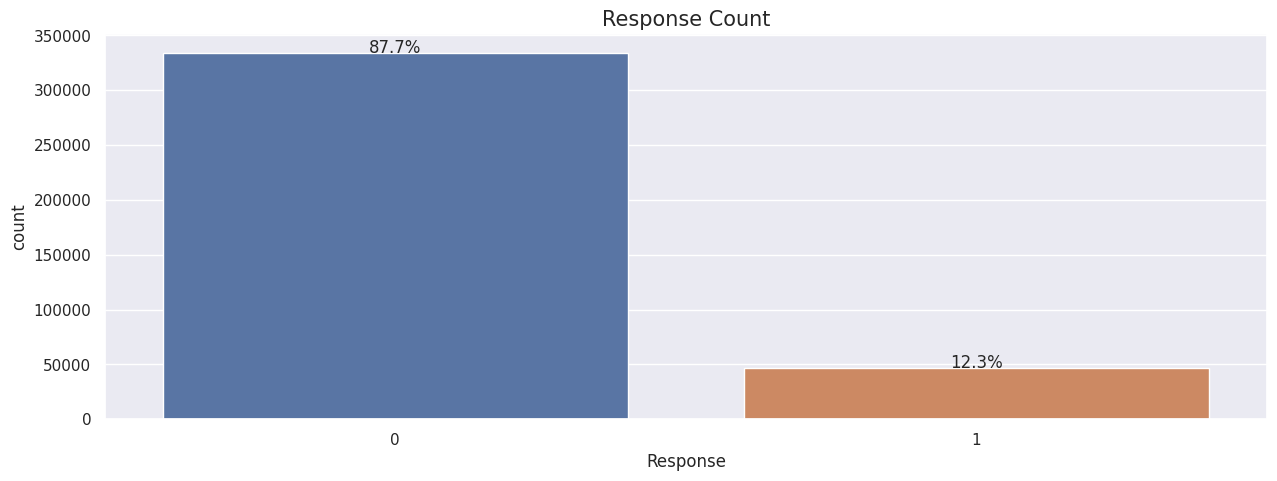

In [ ]:
# Set the style of the plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Set the size of the figure
plt.figure(figsize=(15, 5))

# Get the total number of data points in the DataFrame
total = float(len(df))

# Create a count plot for the 'Response' variable using Seaborn
ax = sns.countplot(x='Response', data=df)

# Set the title of the plot
plt.title('Response Count', fontsize=15)

# Annotate each bar in the plot with the percentage of total data it represents
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax.annotate(percentage, (x, y), ha='center')

# Display the plot
plt.show()

**Insight Found :**
* Data are not balanced, 87.7% percent peopel are not interest and 12.3 percent people are interest

## Gender variable

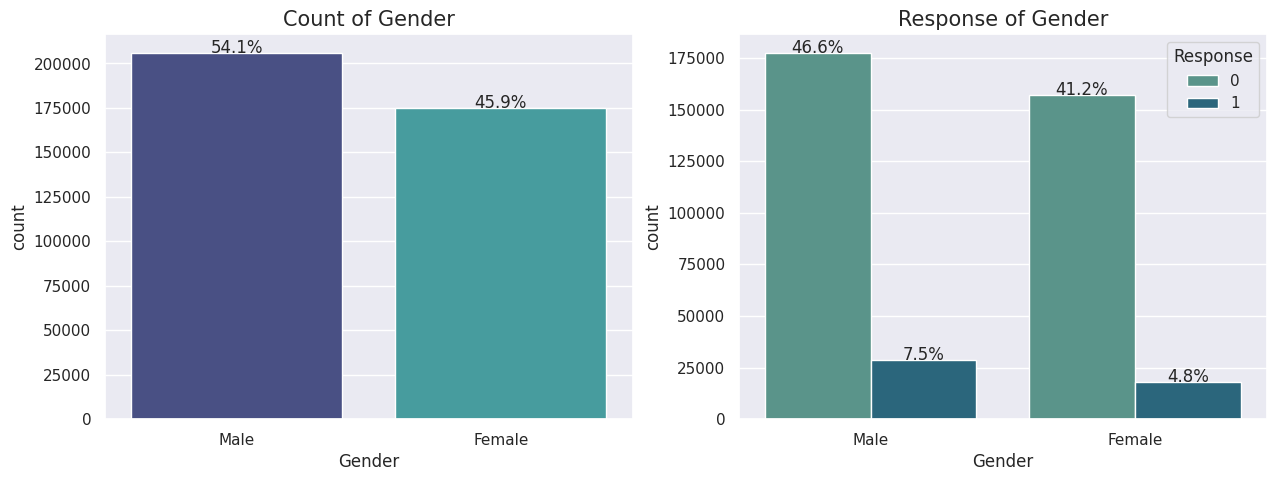

In [6]:
plt.figure(figsize=(15, 5))        # Set the size of the entire figure
plt.subplot(1, 2, 1)               # Create the first subplot (1 row, 2 columns, and select the first plot)
sns.set(style="darkgrid")          # Set the style of the first plot to "darkgrid" using Seaborn
total = float(len(df))             # Get the total number of data points in the DataFrame

ax1 = sns.countplot(x='Gender', palette="mako", data=df)       # Create a count plot for the 'Gender' variable

plt.title('Count of Gender', fontsize=15)                          # Set the title of the first plot

# Annotate each bar in the first plot with the percentage of total data it represents
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')                   # Add the percentage annotation at the center of each bar

# Create the second subplot (1 row, 2 columns, and select the second plot)
plt.subplot(1, 2, 2)

# Create a count plot for the 'Gender' variable with 'Response' as hue
ax2 = sns.countplot(x='Gender', hue='Response', palette="mako", data=df)

# Set the title of the second plot
plt.title('Response of Gender', fontsize=15)

# Annotate each bar in the second plot with the percentage of total data it represents
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax2.annotate(percentage, (x, y), ha='center')

# Display the entire figure
plt.show()

**Insight Found :**

* As we can see from the graph,The gender variable in the dataset is spread nearly evenly. The male category is marginally larger than the female category, and the likelihood of purchasing insurance is also slightly higher.

* The response rate of those who are not interested in purchasing vehicle insurance is higher than that of those who are interested to buy vehicle insurance.

* Only 12.3% people are interested in buying vehicle insurance and 87.7% are not interested to buy vehicle insurance

## Driving License

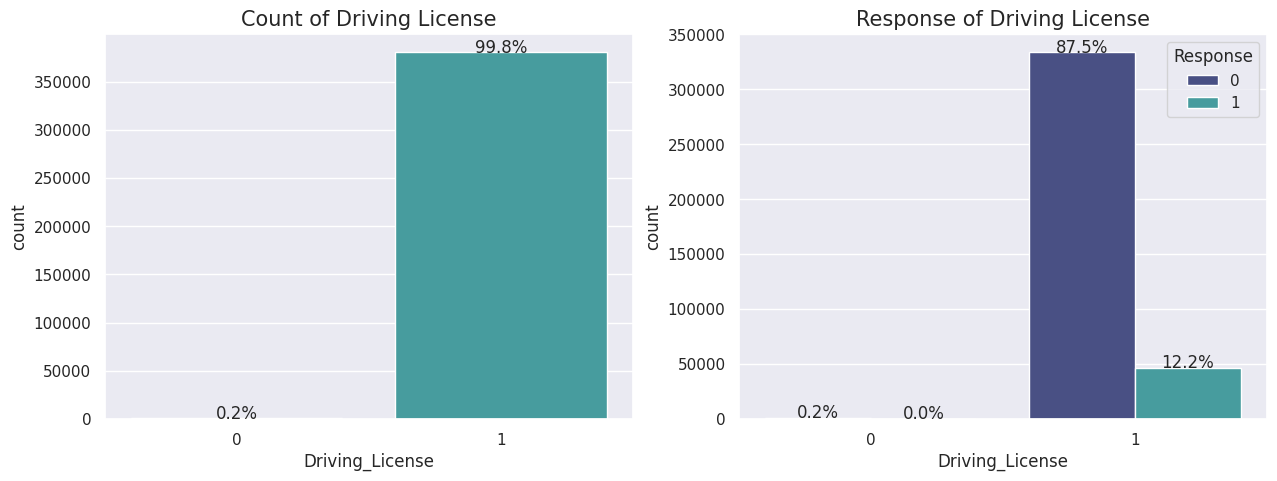

In [7]:
# Set the size of the entire figure
plt.figure(figsize=(15, 5))

# Create the first subplot (1 row, 2 columns, and select the first plot)
plt.subplot(1, 2, 1)

# Set the style of the first plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Get the total number of data points in the DataFrame
total = float(len(df))

# Create a count plot for the 'Driving_License' variable
ax1 = sns.countplot(x='Driving_License', palette="mako", data=df)

# Set the title of the first plot
plt.title('Count of Driving License', fontsize=15)

# Annotate each bar in the first plot with the percentage of total data it represents
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax1.annotate(percentage, (x, y), ha='center')

# Create the second subplot (1 row, 2 columns, and select the second plot)
plt.subplot(1, 2, 2)

# Create a count plot for the 'Driving_License' variable with 'Response' as hue
ax2 = sns.countplot(x='Driving_License', hue='Response', palette="mako", data=df)

# Set the title of the second plot
plt.title('Response of Driving License', fontsize=15)

# Annotate each bar in the second plot with the percentage of total data it represents
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax2.annotate(percentage, (x, y), ha='center')

# Display the entire figure
plt.show()

**Insight Found**
* As we can see from the graph, 99.8% of customers have DL, whereas 0.2% do not have DL.
Only a small percentage of people who have a DL (12.2%) are interested in buying insurance.

## Previously Insured

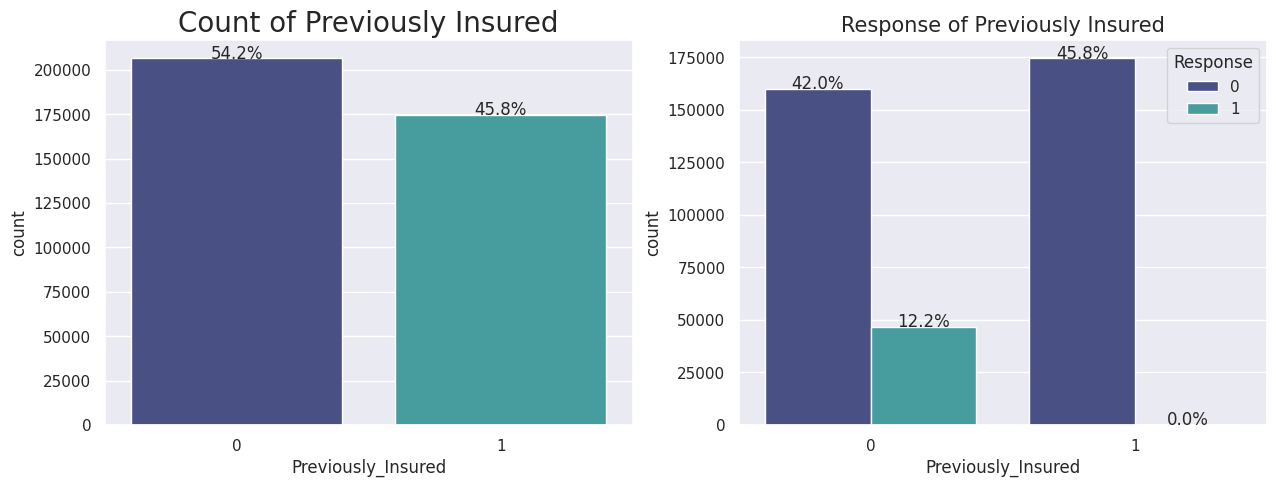

In [8]:
# Set the size of the entire figure
plt.figure(figsize=(15, 5))

# Create the first subplot (1 row, 2 columns, and select the first plot)
plt.subplot(1, 2, 1)

# Set the style of the first plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Get the total number of data points in the DataFrame
total = float(len(df))

# Create a count plot for the 'Previously_Insured' variable
ax1 = sns.countplot(x='Previously_Insured', palette="mako", data=df)

# Set the title of the first plot
plt.title('Count of Previously Insured', fontsize=20)

# Annotate each bar in the first plot with the percentage of total data it represents
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax1.annotate(percentage, (x, y), ha='center')

# Create the second subplot (1 row, 2 columns, and select the second plot)
plt.subplot(1, 2, 2)

# Create a count plot for the 'Previously_Insured' variable with 'Response' as hue
ax2 = sns.countplot(x='Previously_Insured', hue='Response', palette="mako", data=df)

# Set the title of the second plot
plt.title('Response of Previously Insured', fontsize=15)

# Annotate each bar in the second plot with the percentage of total data it represents
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax2.annotate(percentage, (x, y), ha='center')

# Display the entire figure
plt.show()

**Insight Found :**
* As we can see from the graph, 45.8% people are insured previously, in that 12.2% poeple interested to buy the vehicle insurance again(insurance might be expired or should be renewed), Which means people are aware of insurance policy and ready to pay a premium amount, for better off taking actions to avoid certain risks or reduce risk.

* So buying insurance makes the most sense when the potential loss is great and there is a significant probability of loss.

## Vehicle Age

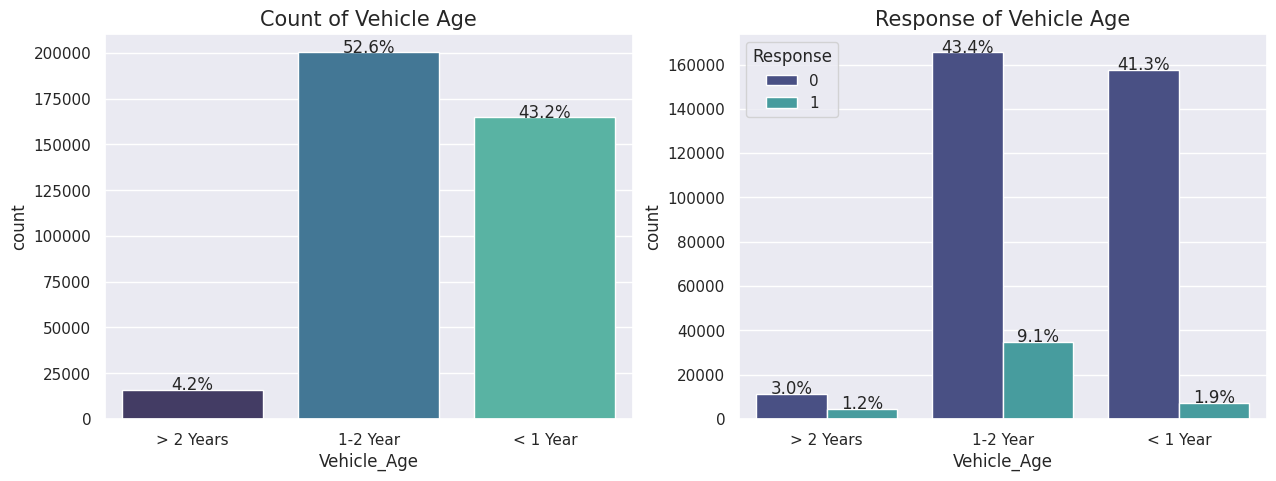

In [9]:
# Set the size of the entire figure
plt.figure(figsize=(15, 5))

# Create the first subplot (1 row, 2 columns, and select the first plot)
plt.subplot(1, 2, 1)

# Set the style of the first plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Get the total number of data points in the DataFrame
total = float(len(df))

# Create a count plot for the 'Vehicle_Age' variable
ax1 = sns.countplot(x='Vehicle_Age', palette="mako", data=df)

# Set the title of the first plot
plt.title('Count of Vehicle Age', fontsize=15)

# Annotate each bar in the first plot with the percentage of total data it represents
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax1.annotate(percentage, (x, y), ha='center')

# Create the second subplot (1 row, 2 columns, and select the second plot)
plt.subplot(1, 2, 2)

# Create a count plot for the 'Vehicle_Age' variable with 'Response' as hue
ax2 = sns.countplot(x='Vehicle_Age', hue='Response', palette="mako", data=df)

# Set the title of the second plot
plt.title('Response of Vehicle Age', fontsize=15)

# Annotate each bar in the second plot with the percentage of total data it represents
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax2.annotate(percentage, (x, y), ha='center')

# Display the entire figure
plt.show()

**Insight Found :**
* As we can see from the graph, Around 4.2% of vehicles are more than two years old, 52.6% are between one and two years old, and 43.2% are under one year old.
* 1.2% are interested in purchasing vehicle insurance for vehicles older than 2 years, 9.1% are interested in purchasing insurance for vehicles between 1 and 2 years old, and 1.9% are interested in purchasing insurance for vehicles older than 1 year.
* As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk

## Annual Premium

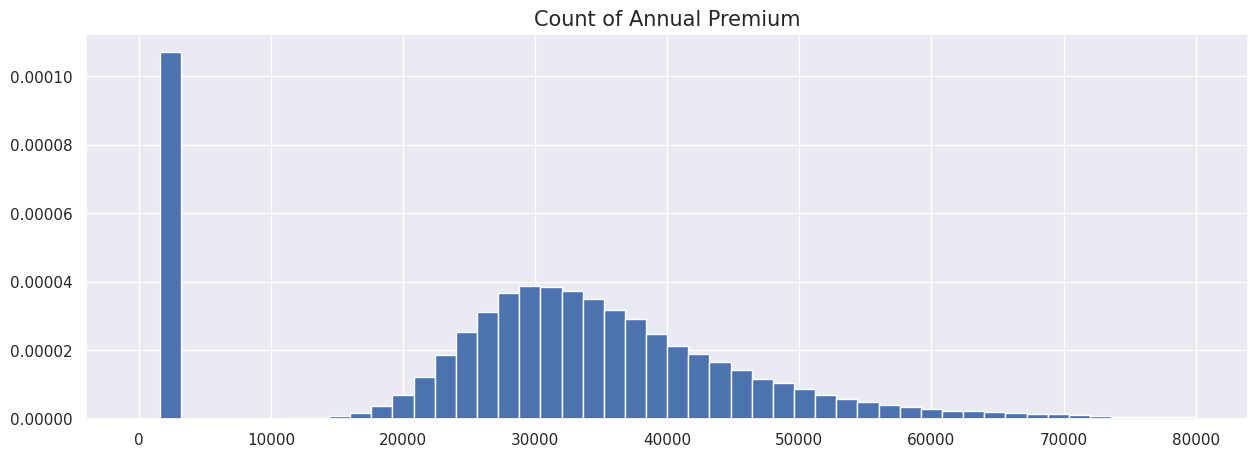

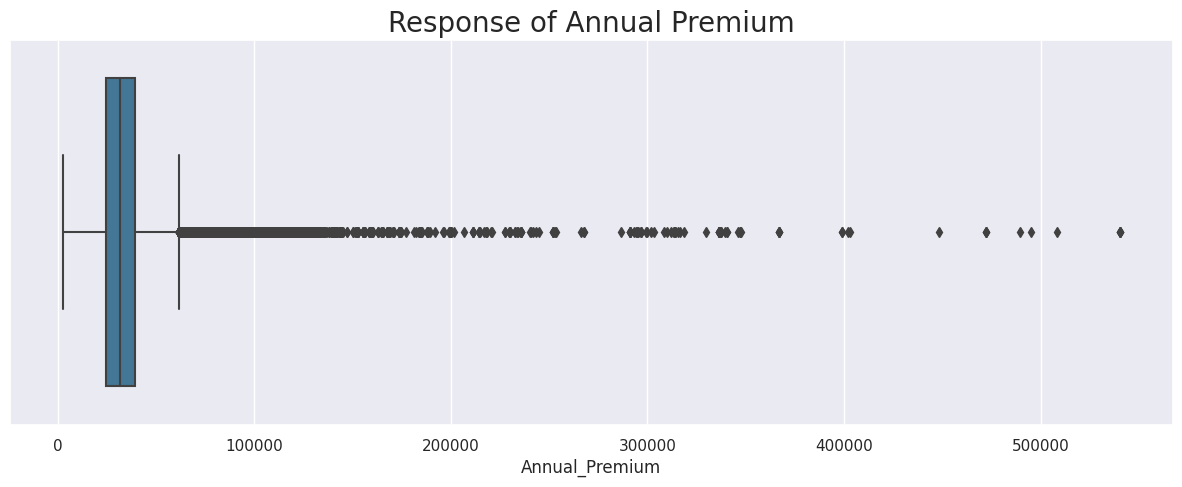

In [10]:
# Set the size of the entire figure
plt.figure(figsize=(15, 5))

# Set the style of the plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Create a histogram for the 'Annual_Premium' variable
df['Annual_Premium'].hist(figsize=(15, 5), bins=50, density=True, range=[0, 80000])

# Set the title of the histogram
plt.title('Count of Annual Premium', fontsize=15)

# Display the histogram
plt.show()

# Create a new figure for the boxplot
plt.figure(figsize=(15, 5))

# Create a boxplot for the 'Annual_Premium' variable
sns.boxplot(x='Annual_Premium', palette="mako", data=df)

# Set the title of the boxplot
plt.title('Response of Annual Premium', fontsize=20)

# Display the boxplot
plt.show()

**Insight Found :**
* From the distribution plot we can infer that the annual premimum variable is right skewed.
* From the boxplot we can observe lot of outliers in the variable.

## Vehicle Damage

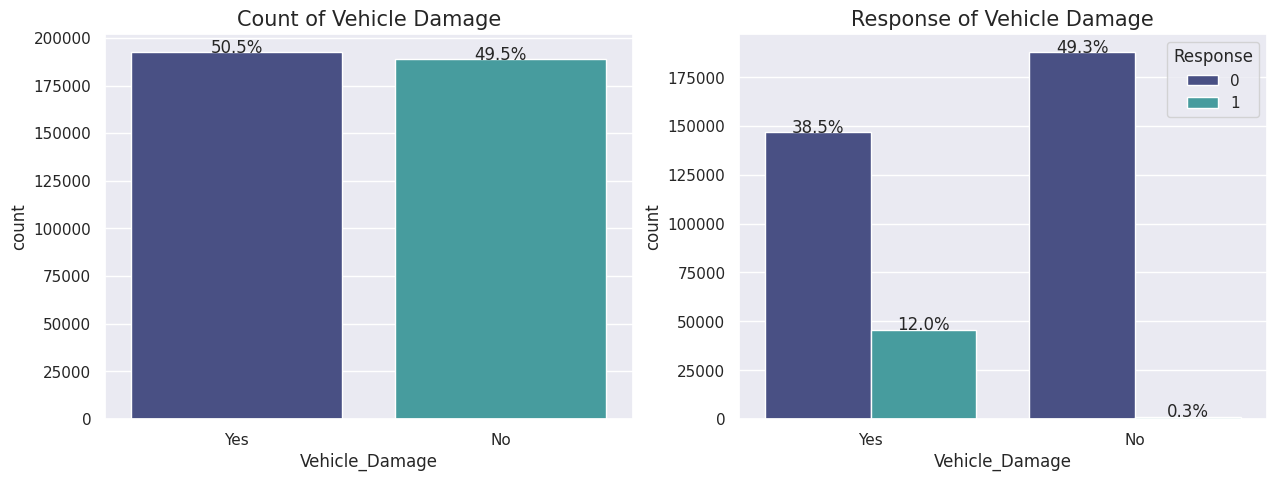

In [11]:
# Set the size of the entire figure
plt.figure(figsize=(15, 5))

# Create the first subplot (1 row, 2 columns, and select the first plot)
plt.subplot(1, 2, 1)

# Set the style of the first plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Get the total number of data points in the DataFrame
total = float(len(df))

# Create a count plot for the 'Vehicle_Damage' variable
ax1 = sns.countplot(x='Vehicle_Damage', palette="mako", data=df)

# Set the title of the first plot
plt.title('Count of Vehicle Damage', fontsize=15)

# Annotate each bar in the first plot with the percentage of total data it represents
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax1.annotate(percentage, (x, y), ha='center')

# Create the second subplot (1 row, 2 columns, and select the second plot)
plt.subplot(1, 2, 2)

# Create a count plot for the 'Vehicle_Damage' variable with 'Response' as hue
ax2 = sns.countplot(x='Vehicle_Damage', hue='Response', palette="mako", data=df)

# Set the title of the second plot
plt.title('Response of Vehicle Damage', fontsize=15)

# Annotate each bar in the second plot with the percentage of total data it represents
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax2.annotate(percentage, (x, y), ha='center')

# Display the entire figure
plt.show()

**Insight Found :**
* As we can see from the graph, 50.5% of the vehicles have past damage.
* 12.0% of people who have had a damaged vehicle in the past want to acquire vehicle insurance.

## Vintage

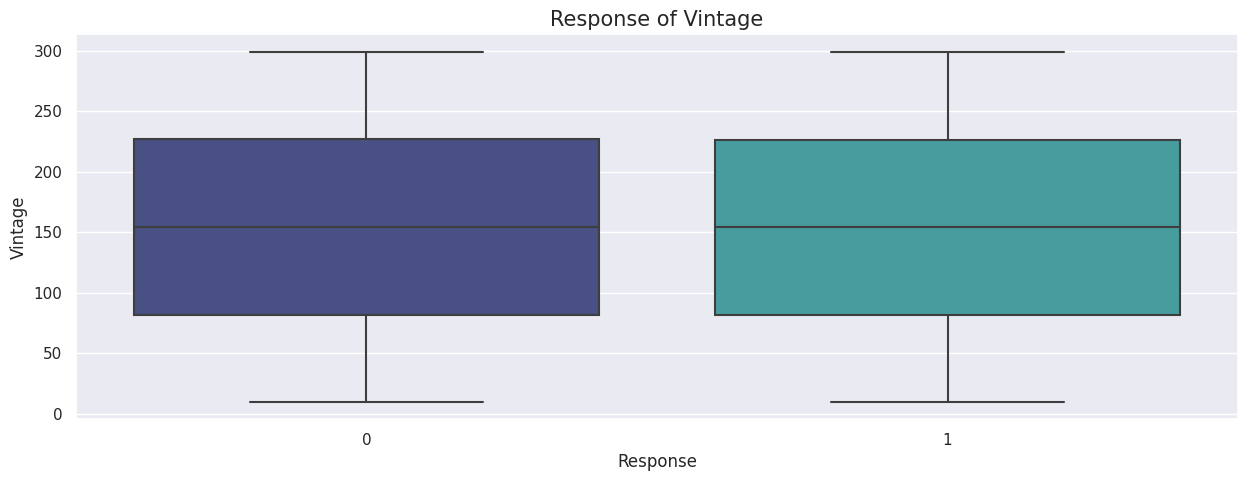

In [12]:
# Set the size of the figure
plt.figure(figsize=(15, 5))

# Create a boxplot for the 'Vintage' variable with 'Response' as hue
sns.boxplot(x='Response', y='Vintage', palette="mako", data=df)

# Set the title of the boxplot
plt.title('Response of Vintage', fontsize=15)

# Display the boxplot
plt.show()

**Insight Found :**
* We can also see that Vintage has an almost uniform distribution from above figure.

## Age

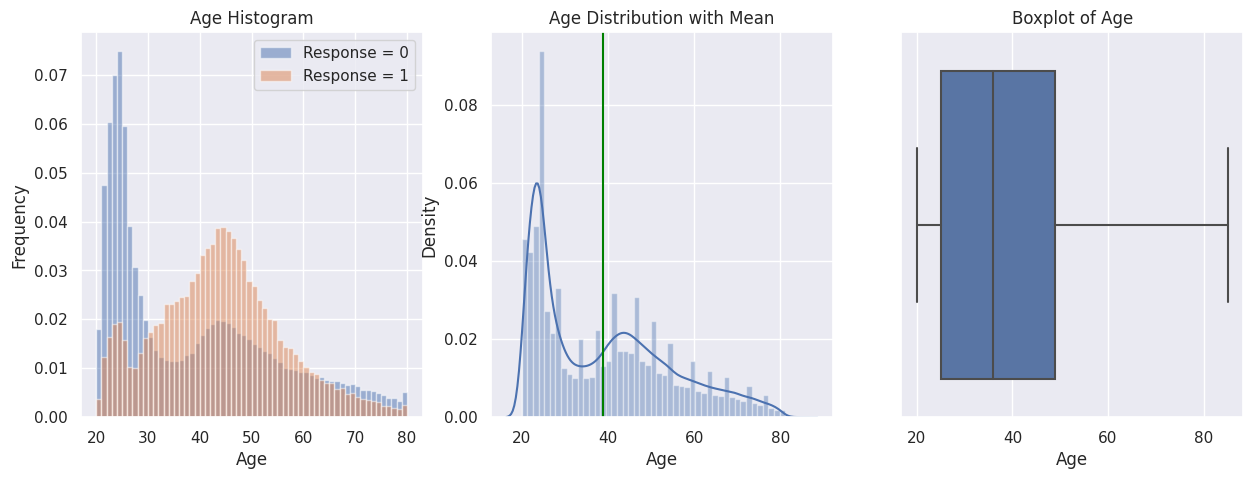

In [ ]:
# Set the size of the entire figure
plt.figure(figsize=(15, 5))

# Plot the Age histogram with response categories
plt.subplot(1, 3, 1)
df.groupby('Response').Age.hist(range=[20, 80], align='mid', bins=60, density=True, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])

# Plot the Age distribution with mean line
plt.subplot(1, 3, 2)
ax = sns.distplot(df['Age'])
ax.axvline(df['Age'].mean(), color='green')
plt.xlabel('Age')
plt.title('Age Distribution with Mean')

# Plot the Age boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='Age', data=df)
plt.title('Boxplot of Age')
# Show the plots
plt.show()

**Insight Found :**
* The dataset has more individuals with an age of 24.
* 40 to 60-year-olds had a higher likelihood of purchasing vehicle insurance.
* From the above boxplot we can see that there no outlier in the dataset.

In [14]:
# Create a new column 'Ages' and copy values from the 'Age' column
df['Ages'] = df['Age']

# Create age labels based on specified age ranges and assign them to the 'Age_label' column
df.loc[(df['Ages'] >= 20) & (df['Ages'] < 27), 'Age_label'] = 'Teenagers(20-26)'
df.loc[(df['Ages'] >= 27) & (df['Ages'] < 29), 'Age_label'] = 'Young(27-28)'
df.loc[(df['Ages'] >= 29) & (df['Ages'] < 58), 'Age_label'] = 'Middle Age(29-57)'
df.loc[(df['Ages'] >= 58) & (df['Ages'] <= 85), 'Age_label'] = 'Old Age(58-84)'

# Update the 'Ages' column with numerical labels corresponding to the age groups
df.loc[(df['Ages'] >= 20) & (df['Ages'] < 27), 'Ages'] = 0
df.loc[(df['Ages'] >= 27) & (df['Ages'] < 29), 'Ages'] = 1
df.loc[(df['Ages'] >= 29) & (df['Ages'] < 58), 'Ages'] = 2
df.loc[(df['Ages'] >= 58) & (df['Ages'] <= 85), 'Ages'] = 3

1. Response according to age :

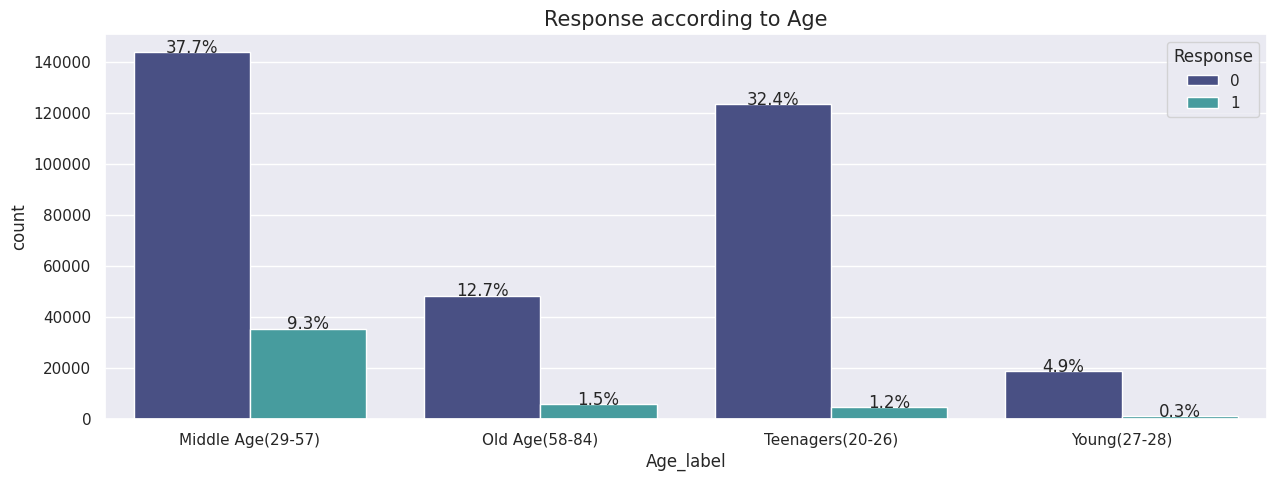

In [15]:
# Set the size of the figure
plt.figure(figsize=(15, 5))

# Set the style of the plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Get the total number of data points in the DataFrame
total = float(len(df))

# Create a count plot for 'Age_label' with 'Response' as hue
ax = sns.countplot(x='Age_label', hue='Response', palette="mako", data=df)

# Set the title of the plot
plt.title('Response according to Age', fontsize=15)

# Annotate each bar with the percentage of total data it represents
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax.annotate(percentage, (x, y), ha='center')

# Display the plot
plt.show()

**Insight :**
* 9.3% of people in their middle age people are interested in purchasing insurance.

2. Driving License according to age:

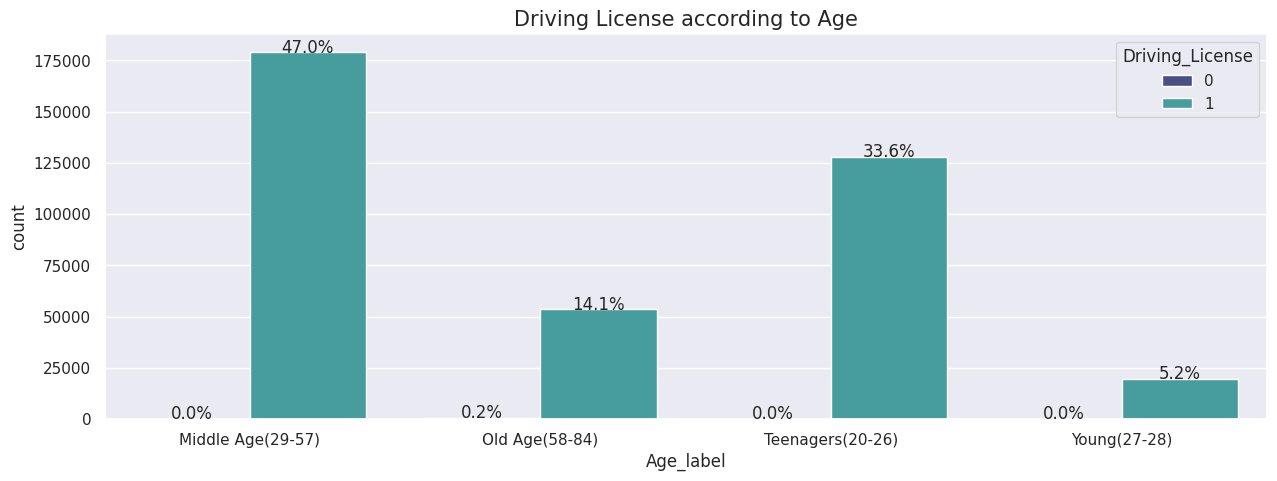

In [16]:
# Set the size of the figure
plt.figure(figsize=(15, 5))

# Set the style of the plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Get the total number of data points in the DataFrame
total = float(len(df))

# Create a count plot for 'Age_label' with 'Driving_License' as hue
ax = sns.countplot(x='Age_label', hue='Driving_License', palette="mako", data=df)

# Set the title of the plot
plt.title('Driving License according to Age', fontsize=15)

# Annotate each bar with the percentage of total data it represents
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax.annotate(percentage, (x, y), ha='center')

# Display the plot
plt.show()

**Insight:**
* Almost 47% of middle-aged individuals have a driver's licence.

3. Previously Insured according to age:

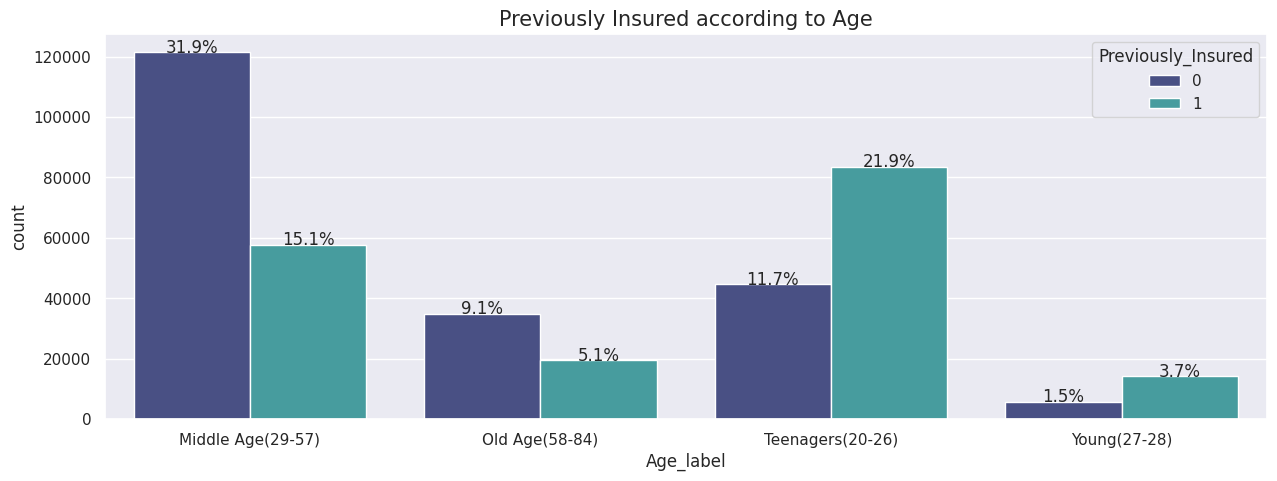

In [17]:
# Set the size of the figure
plt.figure(figsize=(15, 5))

# Set the style of the plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Get the total number of data points in the DataFrame
total = float(len(df))

# Create a count plot for 'Age_label' with 'Previously_Insured' as hue
ax = sns.countplot(x='Age_label', hue='Previously_Insured', palette="mako", data=df)

# Set the title of the plot
plt.title('Previously Insured according to Age', fontsize=15)

# Annotate each bar with the percentage of total data it represents
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax.annotate(percentage, (x, y), ha='center')

# Display the plot
plt.show()

**Insight :**
* About 21.9% of people in their teens have health insurance.

4. Vehicle Damage according to age:

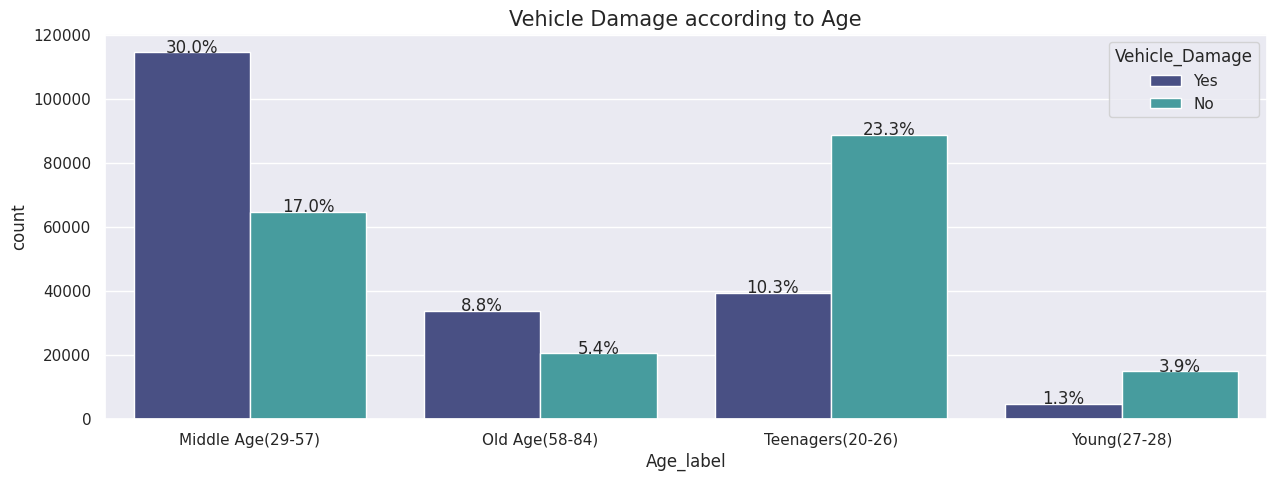

In [18]:
# Set the size of the figure
plt.figure(figsize=(15, 5))

# Set the style of the plot to "darkgrid" using Seaborn
sns.set(style="darkgrid")

# Get the total number of data points in the DataFrame
total = float(len(df))

# Create a count plot for 'Age_label' with 'Vehicle_Damage' as hue
ax = sns.countplot(x='Age_label', hue='Vehicle_Damage', palette="mako", data=df)

# Set the title of the plot
plt.title('Vehicle Damage according to Age', fontsize=15)

# Annotate each bar with the percentage of total data it represents
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Add the percentage annotation at the center of each bar
    ax.annotate(percentage, (x, y), ha='center')

# Display the plot
plt.show()

**Insight :**
* Around 21.9% of persons in their teens have had insurance previously.

* So most teenagers have insurance and are aware of their policy. So the target audience might be middle-aged people and teenagers to generate more leads for insurance companies.

In [19]:
# Drop specified columns ('Ages' and 'Age_label') from the DataFrame
df.drop(columns=['Ages', 'Age_label'], axis=1, inplace=True)

## Correlation Matrix

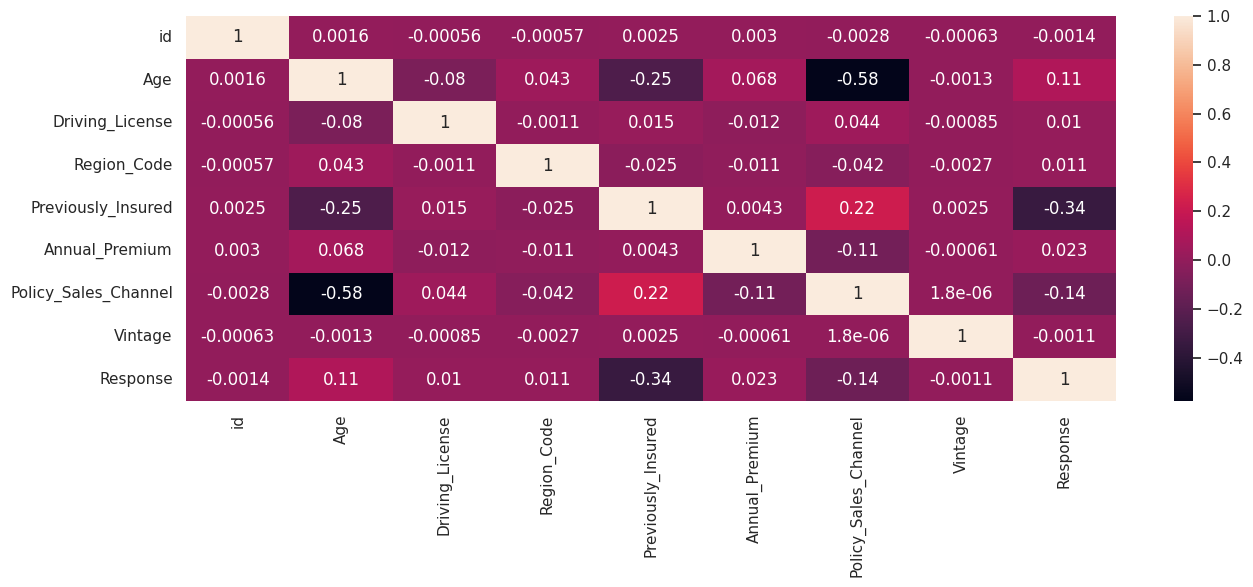

In [ ]:
# Set the size of the figure
plt.figure(figsize=(15, 5))

# Create a heatmap of the correlation matrix of the DataFrame 'df'
# The 'annot=True' parameter adds annotations with correlation values
sns.heatmap(df.corr(), annot=True)

# Display the heatmap
plt.show()

# **Feature Engineering & Data Pre-processing**

#### Multicollinearity

In [ ]:
def cal_vif(X):
    # Calculating VIF (Variance Inflation Factor)
    # Create an empty DataFrame to store variable names and their corresponding VIF values
    vif = pd.DataFrame()

    # Add the column names to the 'variables' column of the DataFrame
    vif["variables"] = X.columns

    # Calculate the VIF for each variable in the DataFrame and store in the 'VIF' column
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Return the DataFrame containing variable names and their VIF values
    return vif

In [ ]:
# Calculate VIF for the variables in the DataFrame 'df' excluding the 'Response' column
# The list comprehension is used to select all columns from the DataFrame except 'Response'
# The selected columns are used as input to the cal_vif function
cal_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.976952
1,Age,10.457630
2,Driving_License,37.690580
3,Region_Code,4.954198
4,Previously_Insured,1.986389
5,Annual_Premium,4.174946
6,Policy_Sales_Channel,7.750265
7,Vintage,4.373295


In [ ]:
# Drop the specified column ('Driving_License') from the DataFrame 'df'
# The 'axis=1' parameter indicates that a column is being dropped
# The 'inplace=True' parameter modifies the DataFrame in-place, without the need for assignment
df.drop(columns=['Driving_License'], axis=1, inplace=True)

* **Correlation:** You can only determine how much two variables are linearly reliant on one another by looking at their correlations.

* The variables are said to be positively connected if the value is positive.

* The variables are said to be negatively linked if the value is negative.

* It is said that there is no correlation between the variables if the value is zero or very near to it.

* Since practically every customer has a driver's license, it is useless to insure anyone without one because it would be detrimental to the business. Hence, we wouldn't provide vehicle insurance to someone who didn't have a license to drive. As we can drop driving license column as they are not providing any valuable information.

## Removing outliers

In [ ]:
# List of columns with potential outliers (only 'Annual_Premium' in this case)
outlier_column = ['Annual_Premium']

# Determining the inter-quartile range (IQR) for the specified column(s) with potential outliers
# Q1 represents the first quartile (25th percentile), Q3 represents the third quartile (75th percentile)
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)

# Calculate the inter-quartile range (IQR) as the difference between Q3 and Q1
IQR = Q3 - Q1
print(IQR)

Annual_Premium    14995.0
dtype: float64


In [ ]:
# Calculate the upper limit for potential outliers using the formula: Q3 + 1.5*IQR
upper_limit = Q3 + (1.5 * IQR)

# Calculate the lower limit for potential outliers using the formula: Q1 - 1.5*IQR
lower_limit = Q1 - (1.5 * IQR)

# Update the DataFrame 'df' by filtering out values that are identified as potential outliers
# The tilde (~) symbol is used to negate the condition, selecting only non-outliers
# This operation is applied specifically to the 'Annual_Premium' column
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        370789 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


* Here you can see some null values are there after outliers treatment in ` Annual_Premium` column

####  Handling Missing Values

In [ ]:
# Replace missing values in the 'Annual_Premium' column with the median value of the column
# This helps handle missing data by filling in the gaps with a central tendency measure (median)
df['Annual_Premium'] = df['Annual_Premium'].fillna(df['Annual_Premium'].median())

In [ ]:
# Lets check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


* We have used the quantile approach to address outliers.

## Feature encoding:

In [ ]:
# Map 'Gender' column values to numerical representation: 'Female' -> 1, 'Male' -> 0
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Map 'Vehicle_Damage' column values to numerical representation: 'Yes' -> 1, 'No' -> 0
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Map 'Vehicle_Age' column values to numerical representation:
# '1-2 Year' -> 1, '< 1 Year' -> 0, '> 2 Years' -> 2
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2})

In [ ]:
# Lets see our dataset after Feature encoding
df.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,41.0,1,0,0,27496.0,152.0,39,0


## Create Independent and Dependent Variables

In [ ]:
# Select a subset of columns from the DataFrame 'df' to create the feature matrix 'x'
# The columns include: 'Gender', 'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Vintage'
x = df[['Gender', 'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Vintage']]

# Create the target variable 'y' by selecting the 'Response' column from the DataFrame 'df'
y = df['Response']

#### Handling Imbalanced Dataset

In [ ]:
# check for imbalance in data
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

* ML techniques like `Decision Trees` and `Logistic Regression` show a bias in favour of the majority class and frequently disregard the minority class.

In [ ]:
# Initialize a RandomOverSampler with a specific random state for reproducibility
ros = RandomOverSampler(random_state=0)

# Apply the resampling technique to balance the class distribution
# The fit_resample method returns the resampled feature matrix 'X_new' and target variable 'y_new'
X_new, y_new = ros.fit_resample(x, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are : 668798
Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


* `Resampling` is the method we employ to solve this problem.
* `RandomOverSampler` from the imbalanced-learn library to address class imbalance in the target variable 'y'.

#### Data Splitting

In [ ]:
# Split the resampled dataset into training and testing sets using train_test_split
# X_new: Feature matrix after resampling, y_new: Resampled target variable
# random_state is set for reproducibility, and test_size is set to 30% for testing data
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42, test_size=0.3)

# Print the shape (number of rows and columns) of the training set
print(X_train.shape, y_train.shape)

# Print the shape of the testing set
print(X_test.shape, y_test.shape)

(468158, 7) (468158,)
(200640, 7) (200640,)


#### Data Scaling

In [ ]:
# Initialize a StandardScaler
scaler = StandardScaler()

# Fit and transform the training data using the scaler to standardize the features
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler to maintain consistency
X_test = scaler.transform(X_test)

# Machine Learning Algorithms

Let's try various machine learning models on our data set to see how they each perform.

1. Logitcal Regression
2. Decision Tree
3. Random Forest
4. KNN
5. Gradient Boost
6. XGBoost
7. LightBGM
---
* **Precision :** Precision is the ratio of true positive predictions to the total number of positive predictions.

* **Recall :** Recall is the ratio of true positive predictions to the total number of actual positive cases.

* **F1-Score :** F1-Score is the harmonic mean of precision and recall.

* **Support :** The support is the number of samples of the true response that lie in that class.

* **Confusion Matrix :** The confusion matrix shows the number of true positive, false positive, true negative, and false negative predictions made by the model.

* **ROC Curve :** A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity).

* **Classification Report :** The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.

### ML Model - 1 : <h2><b><u>Logistic Regression:</u></b></h2>

In [ ]:
# Initialize a Logistic Regression model with a specific random state for reproducibility
logistic_model = LogisticRegression(random_state=30)

# Fit the Logistic Regression model using the training data
logistic_model = logistic_model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred_lg = logistic_model.predict(X_test)

# Predict the probability estimates for class 1 (positive class) for the testing data
y_pred_prob_lg = logistic_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate Recall Score
RS_lgt = recall_score(y_test, y_pred_lg)
print("Recall_Score:", RS_lgt)

# Calculate Precision Score
PS_lgt = precision_score(y_test, y_pred_lg)
print("Precision_Score:", PS_lgt)

# Calculate F1 Score
f1S_lgt = f1_score(y_test, y_pred_lg)
print("F1_Score:", f1S_lgt)

# Calculate Accuracy Score
AS_lgt = accuracy_score(y_pred_lg, y_test)
print("Accuracy_Score:", AS_lgt)

# Calculate ROC AUC Score
acu_lgt = roc_auc_score(y_pred_lg, y_test)
print("ROC_AUC Score:", acu_lgt)

Recall_Score: 0.9761303032715116
Precision_Score: 0.7072006804927806
F1_Score: 0.8201833405092235
Accuracy_Score: 0.7856010765550239
ROC_AUC Score: 0.8342276316203264


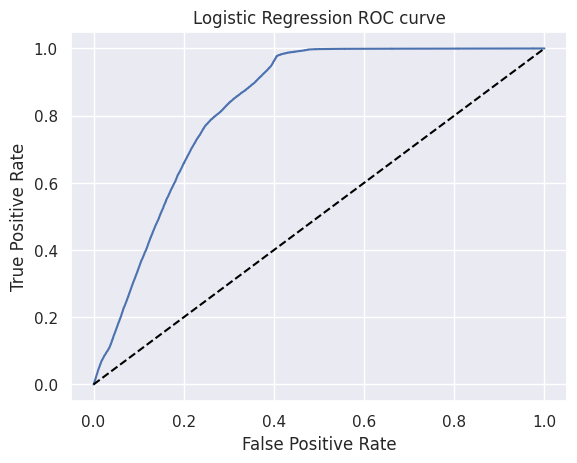

In [ ]:
# Calculate ROC curve values using the predicted probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lg)

# Plot the ROC curve
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)

# Plot the diagonal reference line representing random guessing
plt.plot((0, 1), linestyle="--", color='black')

# Show the plot
plt.show()

[[59518 40618]
 [ 2399 98105]]




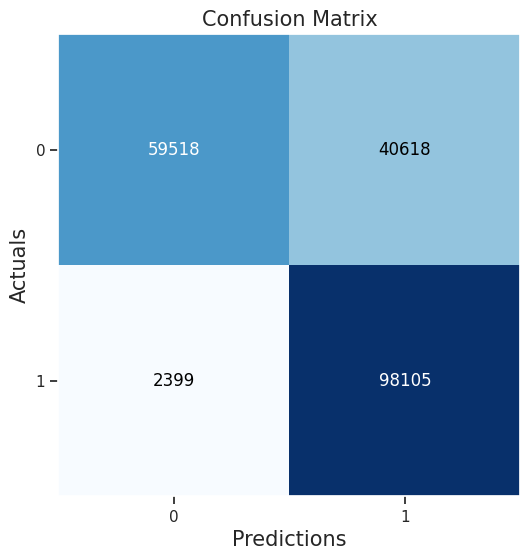

In [ ]:
# Calculate the confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_lg)

# Print the confusion matrix
print(cm_logistic)
print('\n')

# Plot the confusion matrix using the plot_confusion_matrix function
fig, ax = plot_confusion_matrix(conf_mat=cm_logistic, figsize=(6, 6), cmap=plt.cm.Blues)

# Set labels and title for the plot
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)

# Show the plot
plt.show()

In [ ]:
# Generate and print a comprehensive classification report
# It includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640



<h2><b><u>Feature Importance:</u></b></h2>

Previously_Insured   -1.749407
Age                  -0.248555
Gender               -0.056829
Vintage              -0.005160
Annual_Premium        0.040832
Vehicle_Age           0.459781
Vehicle_Damage        0.922494
dtype: float64




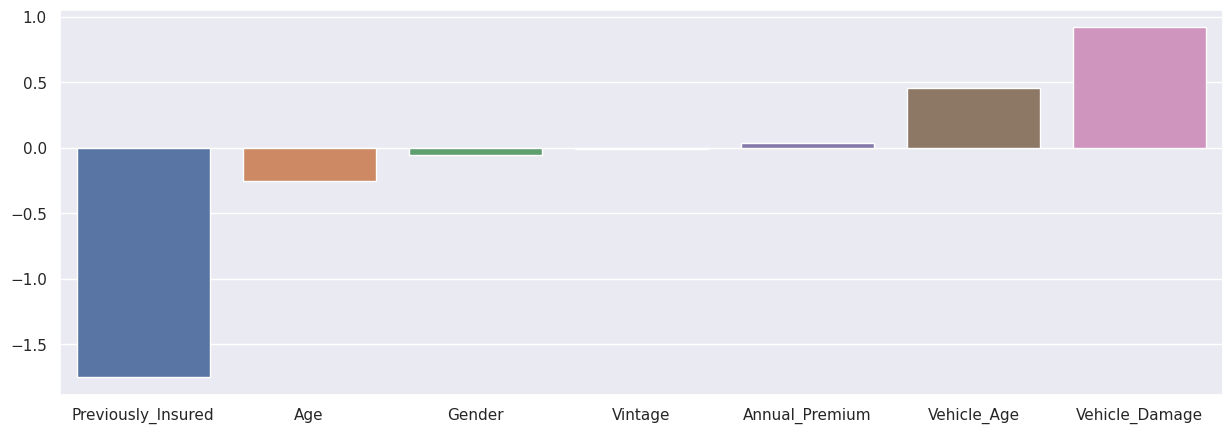

In [ ]:
# Create a Pandas Series to store the coefficients of the logistic regression model
coeff = pd.Series(data=logistic_model.coef_[0], index=x.columns)

# Sort the coefficients in ascending order
coeff = coeff.sort_values()

# Print the sorted coefficients
print(coeff)
print('\n')

# Plot a bar chart to visualize the coefficients
plt.figure(figsize=(15, 5))
sns.barplot(x=coeff.index, y=coeff.values)
plt.show()

<h2><b><u>Hyperparameter Tuning for Logistic Regression:</u></b></h2>

In [ ]:
# Initialize a Logistic Regression model for hyperparameter tuning
logistic_model_tunning = LogisticRegression()

# Define a dictionary of hyperparameters to tune
param_logreg = {'C': [1, 0.5, 0.1, 5, 9], 'penalty': ['l2', 'l1', 'elasticnet']}

# Perform a grid search over the hyperparameter space
# using recall as the scoring metric and 3-fold cross-validation
l_m_t = GridSearchCV(estimator=logistic_model_tunning, param_grid=param_logreg, cv=3, n_jobs=-1, verbose=1, scoring='recall')
l_m_t.fit(X_train, y_train)

# Get the best estimator from the grid search
log_tuned = l_m_t.best_estimator_

# Predict the target variable for the testing data using the tuned model
y_tuned_log = log_tuned.predict(X_test)

# Predict the probability estimates for class 1 (positive class) for the testing data
y_tuned_log_prob = log_tuned.predict_proba(X_test)[:, 1]

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [ ]:
# Calculate Recall Score for the tuned logistic regression model
RS_lgt_tun = recall_score(y_test, y_tuned_log)
print("Recall_Score:", RS_lgt_tun)

# Calculate Precision Score for the tuned logistic regression model
PS_lgt_tun = precision_score(y_test, y_tuned_log)
print("Precision_Score:", PS_lgt_tun)

# Calculate F1 Score for the tuned logistic regression model
f1S_lgt_tun = f1_score(y_test, y_tuned_log)
print("F1_Score:", f1S_lgt_tun)

# Calculate Accuracy Score for the tuned logistic regression model
AS_lgt_tun = accuracy_score(y_tuned_log, y_test)
print("Accuracy_Score:", AS_lgt_tun)

# Calculate ROC AUC Score for the tuned logistic regression model
acu_lgt_tun = roc_auc_score(y_tuned_log, y_test)
print("ROC_AUC Score:", acu_lgt_tun)

Recall_Score: 0.9761303032715116
Precision_Score: 0.7072006804927806
F1_Score: 0.8201833405092235
Accuracy_Score: 0.7856010765550239
ROC_AUC Score: 0.8342276316203264


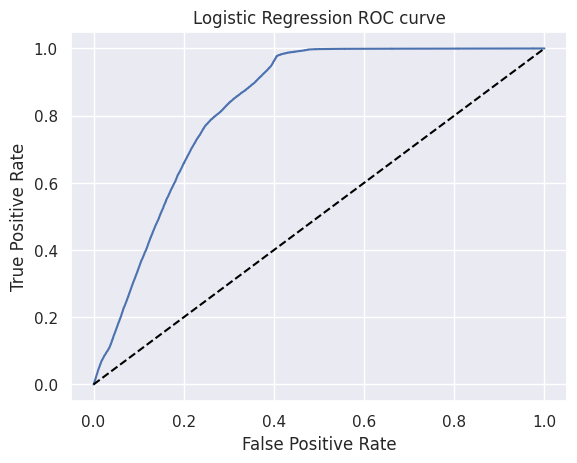

In [ ]:
# Calculate ROC curve values using the probability estimates for class 1 from the tuned logistic regression model
fpr, tpr, _ = roc_curve(y_test, y_tuned_log_prob)

# Plot the ROC curve for the tuned logistic regression model
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)

# Plot the diagonal reference line representing random guessing
plt.plot((0, 1), linestyle="--", color='black')

# Show the plot
plt.show()

[[59518 40618]
 [ 2399 98105]]




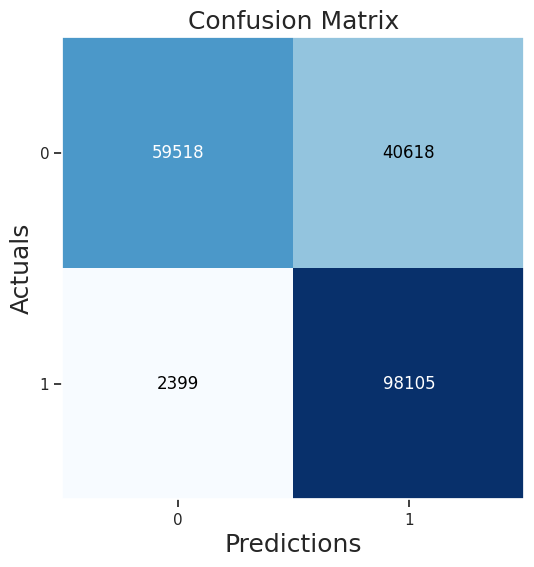

In [ ]:
# Calculate the confusion matrix for the tuned logistic regression model's predictions on the testing data
cm_logistic_tun = confusion_matrix(y_test, y_tuned_log)

# Print the confusion matrix
print(cm_logistic_tun)
print('\n')

# Plot the confusion matrix using the plot_confusion_matrix function
fig, ax = plot_confusion_matrix(conf_mat=cm_logistic_tun, figsize=(6, 6), cmap=plt.cm.Blues)

# Set labels and title for the plot
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

# Show the plot
plt.show()

In [ ]:
# Generate and print a comprehensive classification report
# It includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_tuned_log))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640



### ML Model - 2 : <h2><b><u>Decision Tree:</u></b></h2>

In [ ]:
# Initialize a Decision Tree model with a specific random state for reproducibility
dt_model = DecisionTreeClassifier(random_state=30)

# Fit the Decision Tree model using the training data
dt_model = dt_model.fit(X_train, y_train)

# Predict the target variable for the testing data
dt_pred = dt_model.predict(X_test)

# Predict the probability estimates for class 1 (positive class) for the testing data
dt_pred_prob = dt_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate Recall Score for the Decision Tree model
RS_dt = recall_score(y_test, dt_pred)
print("Recall_Score:", RS_dt)

# Calculate Precision Score for the Decision Tree model
PS_dt = precision_score(y_test, dt_pred)
print("Precision_Score:", PS_dt)

# Calculate F1 Score for the Decision Tree model
f1S_dt = f1_score(y_test, dt_pred)
print("F1_Score:", f1S_dt)

# Calculate Accuracy Score for the Decision Tree model
AS_dt = accuracy_score(y_test, dt_pred)
print("Accuracy_Score:", AS_dt)

# Calculate ROC AUC Score for the Decision Tree model
acu_dt = roc_auc_score(y_test, dt_pred)
print("ROC_AUC Score:", acu_dt)

Recall_Score: 0.9923983125049749
Precision_Score: 0.8843609795889414
F1_Score: 0.9352700130341418
Accuracy_Score: 0.9311901913875598
ROC_AUC Score: 0.9310777214038816


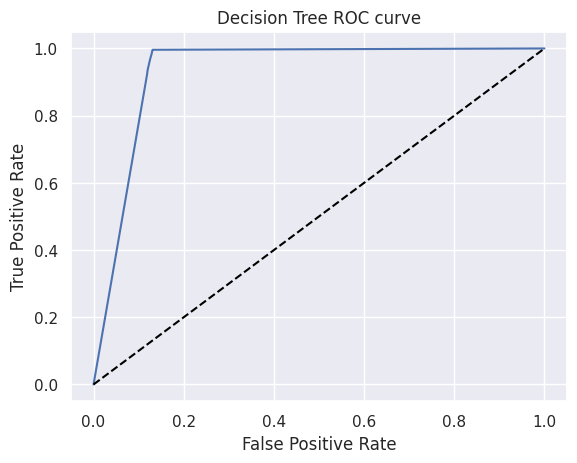

In [ ]:
# Calculate ROC curve values using the probability estimates for class 1 from the Decision Tree model
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)

# Plot the ROC curve for the Decision Tree model
plt.title('Decision Tree ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)

# Plot the diagonal reference line representing random guessing
plt.plot((0, 1), linestyle="--", color='black')

# Show the plot
plt.show()

[[87094 13042]
 [  764 99740]]




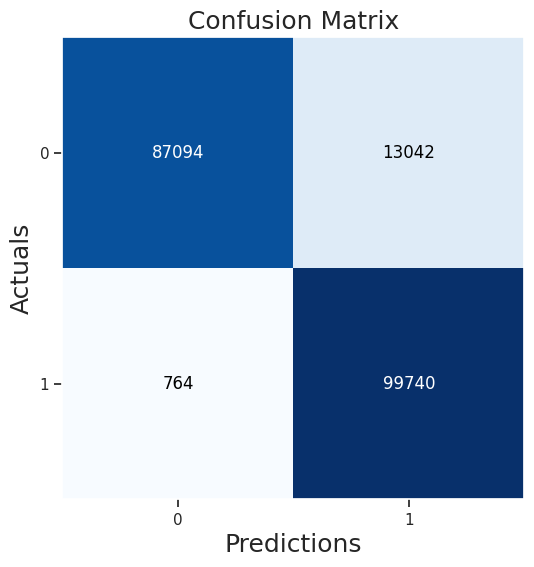

In [ ]:
# Calculate the confusion matrix for the Decision Tree model's predictions on the testing data
cm_dt = confusion_matrix(y_test, dt_pred)

# Print the confusion matrix
print(cm_dt)
print('\n')

# Plot the confusion matrix using the plot_confusion_matrix function
fig, ax = plot_confusion_matrix(conf_mat=cm_dt, figsize=(6, 6), cmap=plt.cm.Blues)

# Set labels and title for the plot
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

# Show the plot
plt.show()

In [ ]:
# Generate and print a comprehensive classification report for the Decision Tree model
# It includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93    100136
           1       0.88      0.99      0.94    100504

    accuracy                           0.93    200640
   macro avg       0.94      0.93      0.93    200640
weighted avg       0.94      0.93      0.93    200640



<h2><b><u>Feature Importance:</u></b></h2>

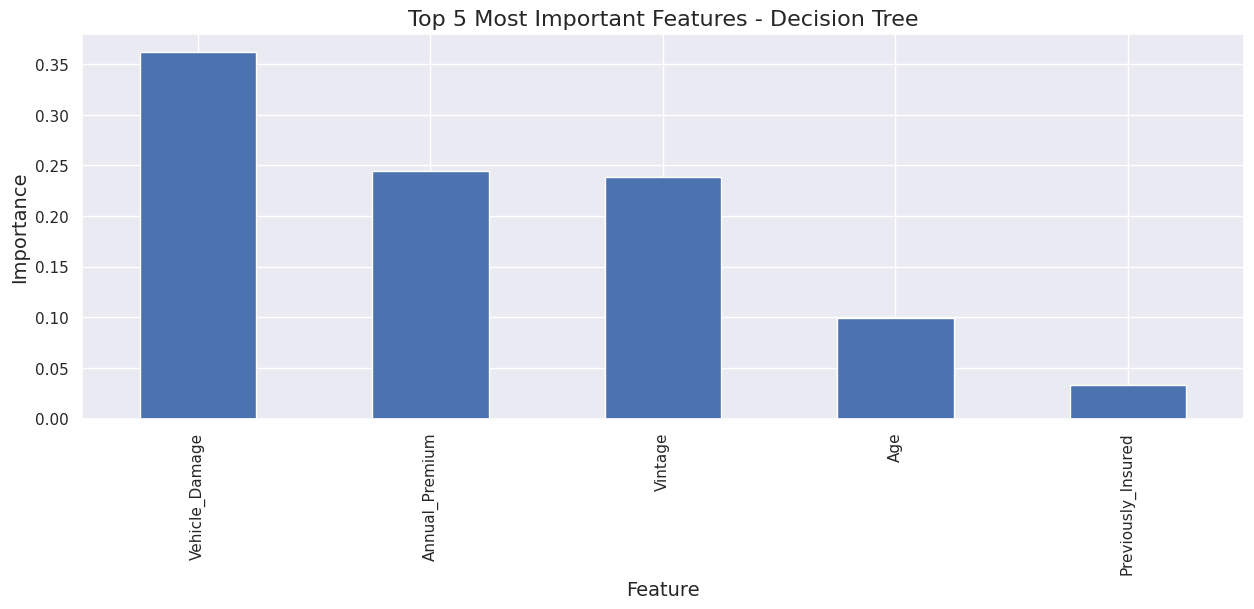

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(15, 5))

# Create a Series of feature importances with corresponding column names
feat_importances = pd.Series(dt_model.feature_importances_, index=X_new.columns)

# Plot the top 5 most important features using a bar plot
feat_importances.nlargest(5).plot(kind='bar')

# Set labels and title for the plot
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Top 5 Most Important Features - Decision Tree', fontsize=16)

# Show the plot
plt.show()

### ML Model - 3 : <h2><b><u>Random Forest:</u></b></h2>

In [ ]:
# Initialize a Random Forest model with a specific random state for reproducibility
rf_model = RandomForestClassifier(random_state=30)

# Fit the Random Forest model using the training data
rf_model = rf_model.fit(X_train, y_train)

# Predict the target variable for the testing data
rf_pred = rf_model.predict(X_test)

# Predict the probability estimates for class 1 (positive class) for the testing data
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]        # [:, 1] is used to extract the probabilities for the positive class.

In [ ]:
# Calculate Recall Score for the Random Forest model
RS_rf = recall_score(y_test, rf_pred)
print("Recall_Score:", RS_rf)

# Calculate Precision Score for the Random Forest model
PS_rf = precision_score(y_test, rf_pred)
print("Precision_Score:", PS_rf)

# Calculate F1 Score for the Random Forest model
f1S_rf = f1_score(y_test, rf_pred)
print("F1_Score:", f1S_rf)

# Calculate Accuracy Score for the Random Forest model
AS_rf = accuracy_score(y_test, rf_pred)
print("Accuracy_Score:", AS_rf)

# Calculate ROC AUC Score for the Random Forest model
acu_rf = roc_auc_score(y_test, rf_pred)
print("ROC_AUC Score:", acu_rf)

Recall_Score: 0.9944977314335748
Precision_Score: 0.8799045715845166
F1_Score: 0.9336982769492332
Accuracy_Score: 0.9292513955342903
ROC_AUC Score: 0.9291315053269177


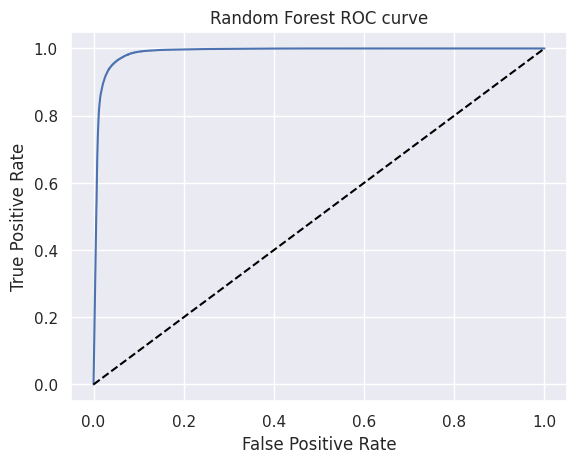

In [ ]:
# Calculate ROC curve values using the probability estimates for class 1 from the Random Forest model
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)

# Plot the ROC curve for the Random Forest model
plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)

# Plot the diagonal reference line representing random guessing
plt.plot((0, 1), linestyle="--", color='black')

# Show the plot
plt.show()

[[86494 13642]
 [  553 99951]]




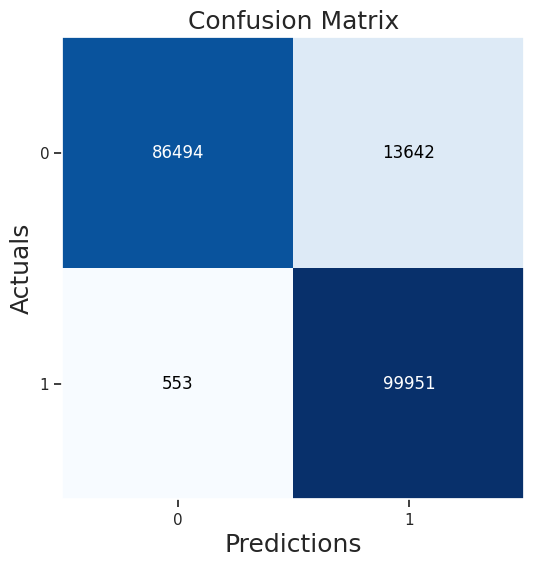

In [ ]:
#confusion matrix
cm_rf= confusion_matrix(y_test, rf_pred)
print(cm_rf)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     87047
           1       0.99      0.88      0.93    113593

    accuracy                           0.93    200640
   macro avg       0.93      0.94      0.93    200640
weighted avg       0.94      0.93      0.93    200640



<h2><b><u>Feature Importance:</u></b></h2>

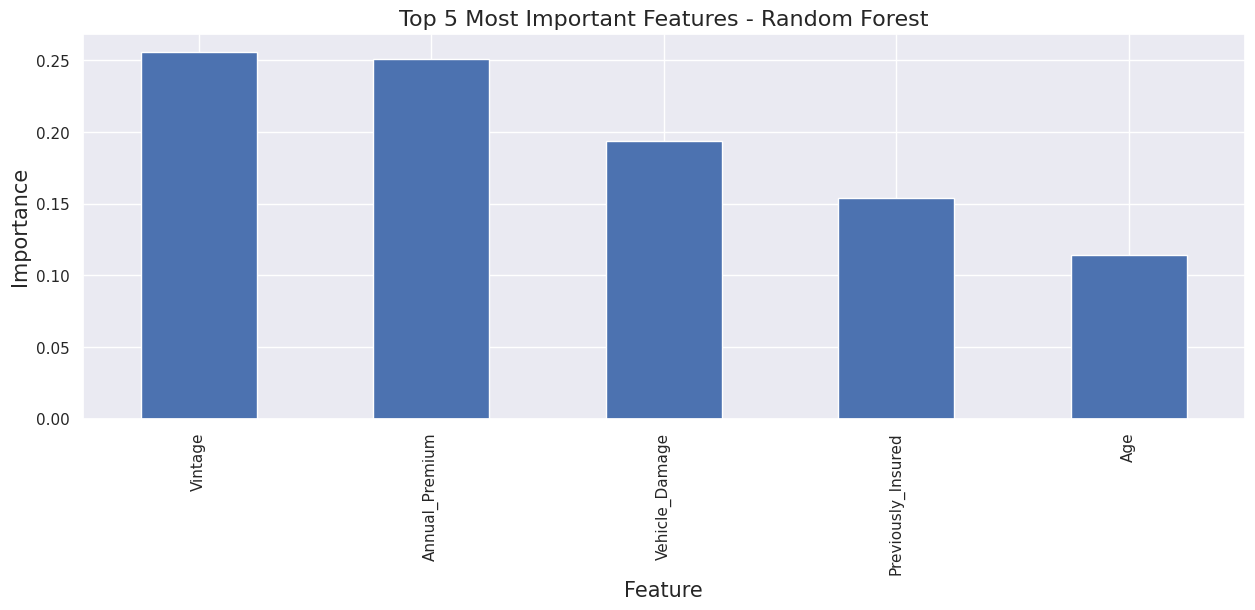

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(15, 5))

# Create a Series of feature importances with corresponding column names from the Random Forest model
feat_importances = pd.Series(rf_model.feature_importances_, index=X_new.columns)

# Plot the top 5 most important features using a bar plot
feat_importances.nlargest(5).plot(kind='bar')

# Set labels and title for the plot
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.title('Top 5 Most Important Features - Random Forest', fontsize=16)

# Show the plot
plt.show()

### ML Model - 4 : <h2><b><u>KNN:</u></b></h2>

In [ ]:
# Initialize a K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Fit the KNN model using the training data
knn_model = knn_model.fit(X_train, y_train)

# Make predictions on the testing data
knn_pred = knn_model.predict(X_test)

# Predict the probability estimates for class 1 (positive class) for the testing data
knn_pred_prob = knn_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate Recall Score for the K-Nearest Neighbors model
RS_knn = recall_score(y_test, knn_pred)
print("Recall_Score:", RS_knn)

# Calculate Precision Score for the K-Nearest Neighbors model
PS_knn = precision_score(y_test, knn_pred)
print("Precision_Score:", PS_knn)

# Calculate F1 Score for the K-Nearest Neighbors model
f1S_knn = f1_score(y_test, knn_pred)
print("F1_Score:", f1S_knn)

# Calculate Accuracy Score for the K-Nearest Neighbors model
AS_knn = accuracy_score(y_test, knn_pred)
print("Accuracy_Score:", AS_knn)

# Calculate ROC AUC Score for the K-Nearest Neighbors model
acu_knn = roc_auc_score(y_test, knn_pred)
print("ROC_AUC Score:", acu_knn)

Recall_Score: 0.9651556156968877
Precision_Score: 0.7908588386844294
F1_Score: 0.8693571370956902
Accuracy_Score: 0.854694976076555
ROC_AUC Score: 0.8544920045409421


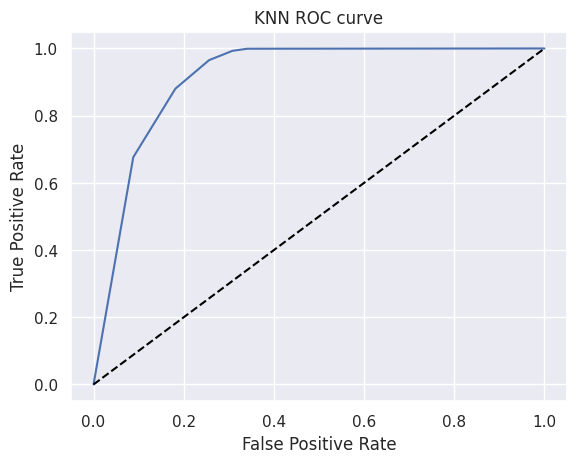

In [ ]:
# Calculate ROC curve values using the probability estimates for class 1 from the K-Nearest Neighbors model
fpr, tpr, _ = roc_curve(y_test, knn_pred_prob)

# Plot the ROC curve for the K-Nearest Neighbors model
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)

# Plot the diagonal reference line representing random guessing
plt.plot((0, 1), linestyle="--", color='black')

# Show the plot
plt.show()

[[74484 25652]
 [ 3502 97002]]




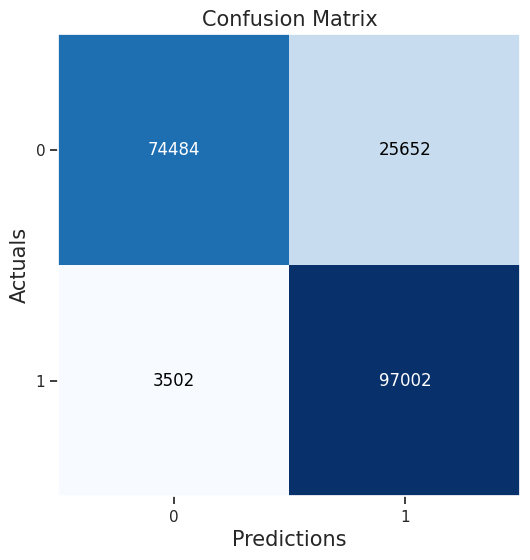

In [ ]:
# Calculate the confusion matrix for the K-Nearest Neighbors model
cm_knn = confusion_matrix(y_test, knn_pred)

# Print the confusion matrix
print(cm_knn)
print('\n')

# Plot the confusion matrix using mlxtend's plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_knn, figsize=(6, 6), cmap=plt.cm.Blues)

# Set labels and title for the plot
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)

# Show the plot
plt.show()

In [ ]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84     77986
           1       0.97      0.79      0.87    122654

    accuracy                           0.85    200640
   macro avg       0.85      0.87      0.85    200640
weighted avg       0.88      0.85      0.86    200640



### ML Model - 5 : <h2><b><u>XGBoost:</u></b></h2>

In [ ]:
# Initialize an XGBoost model with a specified random state
XG_model = XGBClassifier(random_state=30)

# Fit the XGBoost model using the training data
XG_model = XG_model.fit(X_train, y_train)

# Make predictions on the testing data using the trained XGBoost model
XG_pred = XG_model.predict(X_test)

# Predict the probability estimates for class 1 (positive class) using the XGBoost model
XG_pred_prob = XG_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation
# Calculate Recall Score for the XGBoost model
RS_XG = recall_score(y_test, XG_pred)
print("Recall_Score:", RS_XG)

# Calculate Precision Score for the XGBoost model
PS_XG = precision_score(y_test, XG_pred)
print("Precision_Score:", PS_XG)

# Calculate F1 Score for the XGBoost model
f1S_XG = f1_score(y_test, XG_pred)
print("F1_Score:", f1S_XG)

# Calculate Accuracy Score for the XGBoost model
AS_XG = accuracy_score(y_test, XG_pred)
print("Accuracy_Score:", AS_XG)

# Calculate ROC AUC Score for the XGBoost model
acu_XG = roc_auc_score(y_test, XG_pred)
print("ROC_AUC Score:", acu_XG)


Recall_Score: 0.9336643317678899
Precision_Score: 0.7427868060887668
F1_Score: 0.827359093614301
Accuracy_Score: 0.8048195773524721
ROC_AUC Score: 0.8045828249875641


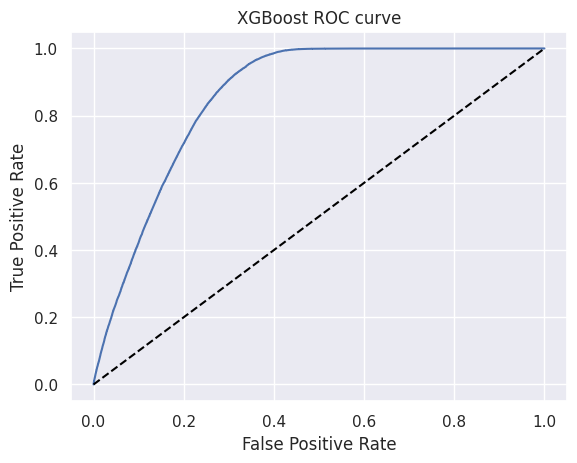

In [ ]:
# Compute the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the XGBoost model
fpr, tpr, _ = roc_curve(y_test, XG_pred_prob)

# Plot the ROC curve for the XGBoost model
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)  # Plot the ROC curve
plt.plot((0, 1), linestyle="--", color='black')  # Plot the diagonal line for reference
plt.show()

[[67642 32494]
 [ 6667 93837]]




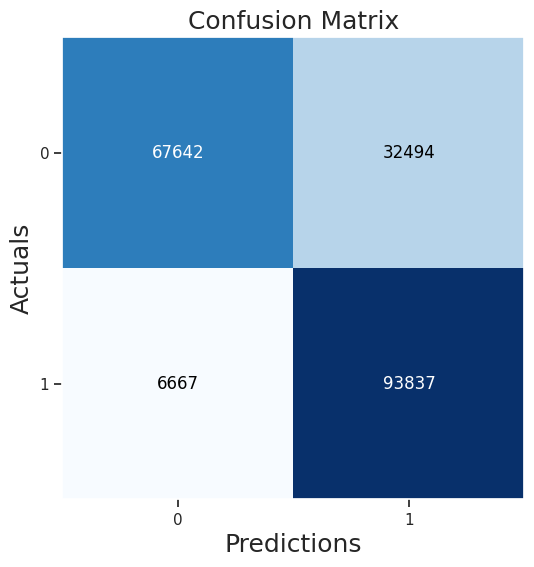

In [ ]:
# Compute the confusion matrix for the XGBoost model's predictions
cm_XB = confusion_matrix(y_test, XG_pred)
print(cm_XB)
print('\n')

# Plot the confusion matrix for better visualization
fig, ax = plot_confusion_matrix(conf_mat=cm_XB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(XG_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78     74309
           1       0.93      0.74      0.83    126331

    accuracy                           0.80    200640
   macro avg       0.80      0.83      0.80    200640
weighted avg       0.84      0.80      0.81    200640



### ML Model - 6 : <h2><b><u>Gradient Boosting:</u></b></h2>

In [ ]:
# Initialize a Gradient Boosting model with a specified random state
GB_model = GradientBoostingClassifier(random_state=30)

# Fit the Gradient Boosting model using the training data
GB_model = GB_model.fit(X_train, y_train)

# Make predictions on the testing data using the trained Gradient Boosting model
GB_pred = GB_model.predict(X_test)

# Predict the probability estimates for class 1 (positive class) using the Gradient Boosting model
GB_pred_prob = GB_model.predict_proba(X_test)[:, 1]

In [ ]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

# Calculate and print the Recall Score for the Gradient Boosting model
RS_GB = recall_score(y_test, GB_pred)
print("Recall_Score : ", RS_GB)

# Calculate and print the Precision Score for the Gradient Boosting model
PS_GB = precision_score(y_test, GB_pred)
print("Precision_Score :", PS_GB)

# Calculate and print the F1 Score for the Gradient Boosting model
f1S_GB = f1_score(y_test, GB_pred)
print("f1_Score :", f1S_GB)

# Calculate and print the Accuracy Score for the Gradient Boosting model
AS_GB = accuracy_score(y_test, GB_pred)
print("Accuracy_Score :", AS_GB)

# Calculate and print the ROC_AUC Score for the Gradient Boosting model
acu_GB = roc_auc_score(y_test, GB_pred)
print("ROC_AUC Score:", acu_GB)

Recall_Score :  0.9273760248348324
Precision_Score : 0.7346148995869983
f1_Score : 0.8198170463541209
Accuracy_Score : 0.7958034290271132
ROC_AUC Score: 0.7955616642509226


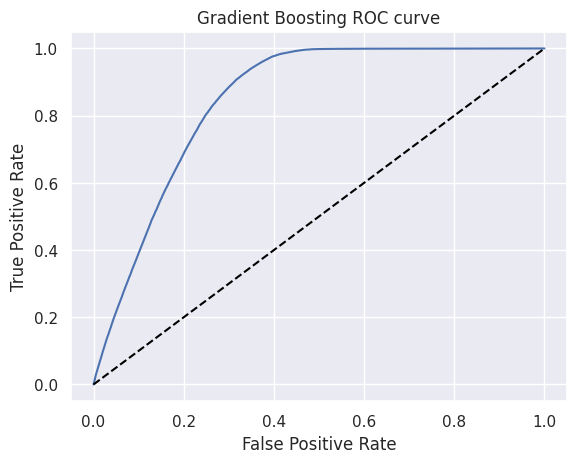

In [ ]:
#ROC Curve
# Calculate the False Positive Rate, True Positive Rate, and thresholds for the Gradient Boosting model
fpr, tpr, _ = roc_curve(y_test, GB_pred_prob)

# Plot the ROC curve for better visualization of model performance
plt.title('Gradient Boosting ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot((0, 1), linestyle="--", color='black')  # Diagonal reference line for random guessing
plt.show()


[[66465 33671]
 [ 7299 93205]]




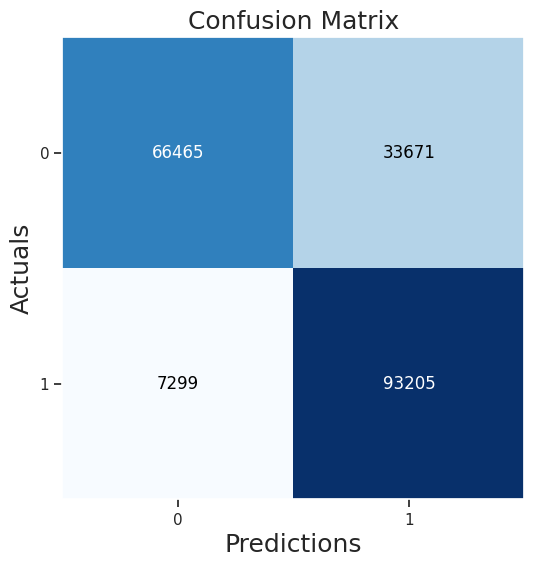

In [ ]:
# Calculate and print the Confusion Matrix for the Gradient Boosting model
cm_GB = confusion_matrix(y_test, GB_pred)
print(cm_GB)
print('\n')

# Plot the Confusion Matrix using the plot_confusion_matrix function
fig, ax = plot_confusion_matrix(conf_mat=cm_GB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(GB_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76     73764
           1       0.93      0.73      0.82    126876

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



### ML Model - 6 : <h2><b><u>LightBGM:</u></b></h2>

In [ ]:
# Create and train the LightGBM model on the training data
lgbm_model = LGBMClassifier(random_state=30)
lgbm_model = lgbm_model.fit(X_train, y_train)

# Make predictions on the test data
lgbm_pred = lgbm_model.predict(X_test)

# Predict the probability estimates for class 1 (positive class) using the  LightGBM  model
lgbm_pred_prob = lgbm_model.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 233895, number of negative: 234263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 468158, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499607 -> initscore=-0.001572
[LightGBM] [Info] Start training from score -0.001572


In [ ]:
# Calculate and print the Recall Score for the LightGBM model
RS_lgbm = recall_score(y_test, lgbm_pred)
print("Recall_Score : ", RS_lgbm)

# Calculate and print the Precision Score for the LightGBM model
PS_lgbm = precision_score(y_test, lgbm_pred)
print("Precision_Score :", PS_lgbm)

# Calculate and print the F1 Score for the LightGBM model
f1S_lgbm = f1_score(y_test, lgbm_pred)
print("f1_Score :", f1S_lgbm)

# Calculate and print the Accuracy Score for the LightGBM model
AS_lgbm = accuracy_score(y_test, lgbm_pred)
print("Accuracy_Score :", AS_lgbm)

# Calculate and print the ROC_AUC Score for the LightGBM model
acu_lgbm = roc_auc_score(y_test, lgbm_pred)
print("ROC_AUC Score:", acu_lgbm)

Recall_Score :  0.9277441693862931
Precision_Score : 0.7368637337105557
f1_Score : 0.8213598305166864
Accuracy_Score : 0.7978518740031898
ROC_AUC Score: 0.7976131967807074


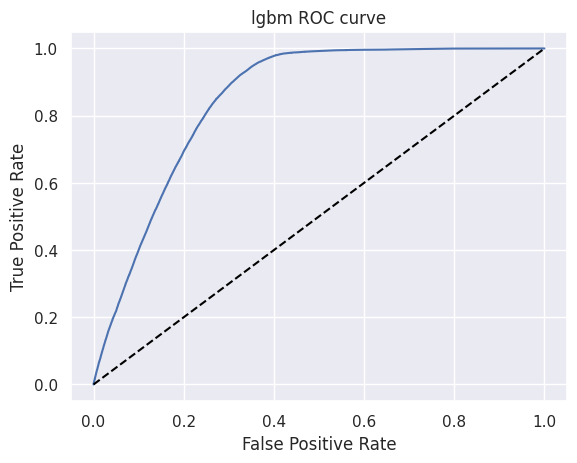

In [ ]:
# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds using roc_curve
fpr, tpr, _ = roc_curve(y_test, lgbm_pred_prob)

# Plot the ROC curve for the LightGBM model
plt.title('lgbm ROC curve')  # Set the plot title
plt.xlabel("False Positive Rate")  # Set the x-axis label
plt.ylabel("True Positive Rate")  # Set the y-axis label
plt.plot(fpr, tpr)  # Plot the ROC curve
plt.plot((0, 1), linestyle="--", color='black')  # Plot a dashed line representing random guessing
plt.show()  # Display the plot

[[66839 33297]
 [ 7262 93242]]




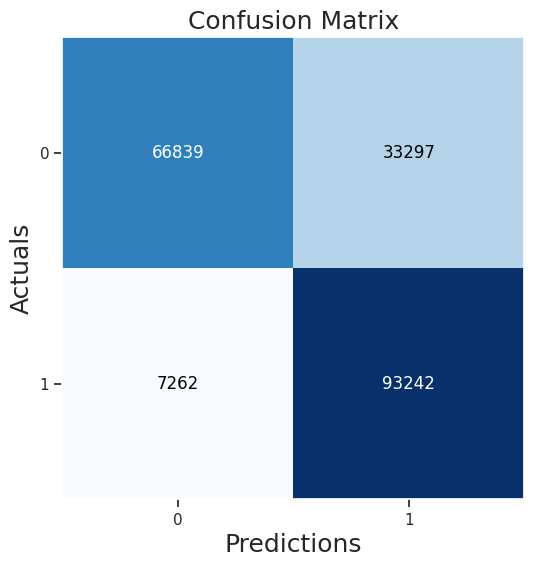

In [ ]:
# Calculate the confusion matrix for the LightGBM model predictions
cm_lgbm = confusion_matrix(y_test, lgbm_pred)

# Display the confusion matrix and plot it
print(cm_lgbm)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_lgbm, figsize=(6, 6), cmap=plt.cm.Blues)

# Set axis labels and title for the confusion matrix plot
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

# Show the confusion matrix plot
plt.show()

In [ ]:
print(classification_report(lgbm_pred, y_test))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77     74101
           1       0.93      0.74      0.82    126539

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



 <h2><b><u>Hyperparameter tuning for LightGBM:</u></b></h2>

In [ ]:
# Import necessary libraries for model tuning
from sklearn.metrics import make_scorer, fbeta_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import HalvingGridSearchCV

# Define the f2 score as a scoring metric for model tuning
f2 = make_scorer(fbeta_score, beta=2)

# Create a LightGBM classifier and set the parameter grid for tuning
lgbm = LGBMClassifier()
parameters = {
    "n_estimators": [200, 300, 400],
    "max_depth": [3, 5, 9],}

# Perform Halving Grid Search Cross Validation with f2 score as the scoring metric
cv = HalvingGridSearchCV(lgbm, parameters, scoring=f2, cv=3, n_jobs=-1, verbose=1)
cv.fit(X_train, y_train)

# Display the best parameters and corresponding f2 score
cv.best_params_, cv.best_score_

# Create a new LightGBM classifier with the best parameters
tuned_lgbm = LGBMClassifier(**cv.best_params_)

# Fit the tuned model on the training data
tuned_lgbm.fit(X_train, y_train)

# Make predictions on the test set using the tuned model
y_tun_lgbm = tuned_lgbm.predict(X_test)
y_tun_pred_prob = tuned_lgbm.predict_proba(X_test)[:, 1]

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 52017
max_resources_: 468158
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 52017
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 1
n_candidates: 3
n_resources: 156051
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 1
n_resources: 468153
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 233895, number of negative: 234263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memor

In [ ]:
# Calculate the recall score for the tuned LightGBM model
RS_lgbm_tun = recall_score(y_test, y_tun_lgbm)
print("Recall_Score : ", RS_lgbm_tun)

# Calculate the precision score for the tuned LightGBM model
PS_lgbm_tun = precision_score(y_test, y_tun_lgbm)
print("Precision_Score :", PS_lgbm_tun)

# Calculate the F1 score for the tuned LightGBM model
f1S_lgbm_tun = f1_score(y_test, y_tun_lgbm)
print("f1_Score :", f1S_lgbm_tun)

# Calculate the accuracy score for the tuned LightGBM model
AS_lgbm_tun = accuracy_score(y_test, y_tun_lgbm)
print("Accuracy_Score :", AS_lgbm_tun)

# Calculate the ROC-AUC score for the tuned LightGBM model
acu_lgbm_tun = roc_auc_score(y_test, y_tun_lgbm)
print("ROC_AUC Score:", acu_lgbm_tun)

Recall_Score :  0.9281919127596912
Precision_Score : 0.7391469705013113
f1_Score : 0.8229523670896683
Accuracy_Score : 0.7999451754385964
ROC_AUC Score: 0.7997095219306964


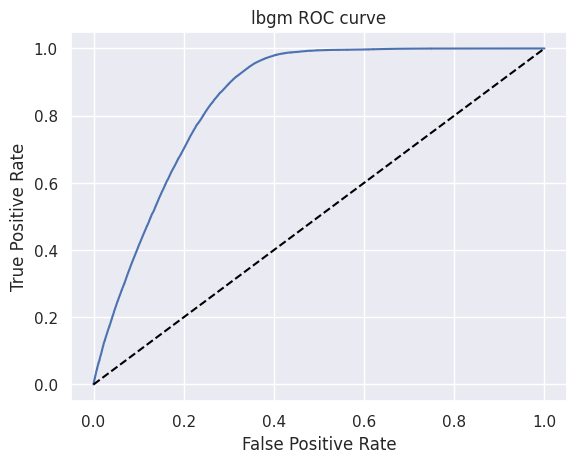

In [ ]:
# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the tuned LightGBM model
fpr, tpr, _ = roc_curve(y_test, y_tun_pred_prob)

# Plot the ROC curve for the tuned LightGBM model
plt.title('lbgm ROC curve')  # Set the title of the plot
plt.xlabel("False Positive Rate")  # Label the x-axis
plt.ylabel("True Positive Rate")   # Label the y-axis
plt.plot(fpr, tpr)  # Plot the ROC curve
plt.plot((0, 1), linestyle="--", color='black')  # Plot a dashed line for reference
plt.show()  # Display the plot

[[67214 32922]
 [ 7217 93287]]




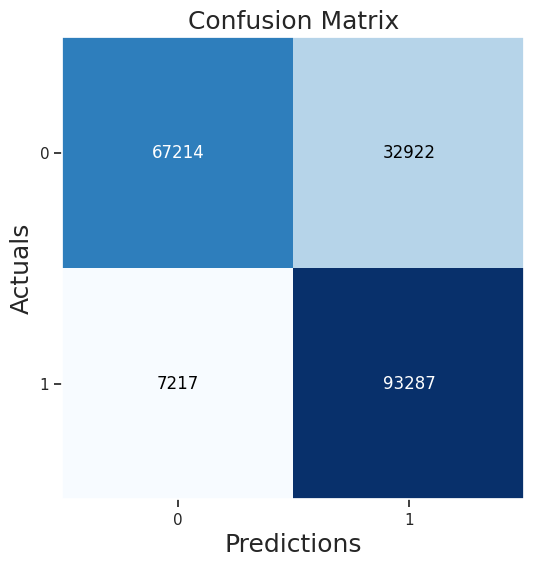

In [ ]:
# Create a confusion matrix for the tuned LightGBM model
cm_lgbm_tun = confusion_matrix(y_test, y_tun_lgbm)

# Print the confusion matrix
print(cm_lgbm_tun)
print('\n')

# Plot the confusion matrix using the plot_confusion_matrix function
fig, ax = plot_confusion_matrix(conf_mat=cm_lgbm_tun, figsize=(6, 6), cmap=plt.cm.Blues)

# Label the x-axis of the confusion matrix
plt.xlabel('Predictions', fontsize=18)

# Label the y-axis of the confusion matrix
plt.ylabel('Actuals', fontsize=18)

# Set the title of the confusion matrix plot
plt.title('Confusion Matrix', fontsize=18)

# Display the plot
plt.show()

In [ ]:
print(classification_report(y_tun_lgbm, y_test))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77     74431
           1       0.93      0.74      0.82    126209

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.80    200640
weighted avg       0.83      0.80      0.80    200640



<h2><b><u>Result of all models:</u></b></h2>

In [ ]:
list_of_model = ['Logistic Regression','Decision Tree ','Random Forest','KNN','Gradient Boosting','Extreme Gradient Boosting','LGBM']

result_list_RS = [RS_lgt,RS_dt,RS_rf,RS_knn,RS_GB,RS_XG,RS_lgbm]
result_list_PS = [PS_lgt,RS_dt,PS_rf,PS_knn,PS_GB,PS_XG,PS_lgbm]
result_list_f1S = [f1S_lgt,f1S_dt,f1S_rf,f1S_knn,f1S_GB,f1S_XG,f1S_lgbm]
result_list_AS = [AS_lgt,AS_dt,AS_rf,AS_knn,AS_GB,AS_XG,AS_lgbm]
relust_list_Acu=[acu_lgt,acu_dt,acu_rf,acu_knn,acu_GB,acu_XG,acu_lgbm]

In [ ]:
# creating an empty dataframe
results_df = pd.DataFrame()

In [ ]:
results_df['model_name'] = list_of_model
results_df['Recall_Score'] = result_list_RS
results_df['Precision_Score'] = result_list_PS
results_df['f1_Score'] = result_list_f1S
results_df['Accuracy_Score'] = result_list_AS
results_df['ROC_AUC Score'] = relust_list_Acu

In [ ]:
results_df

,model_name,Recall_Score,Precision_Score,f1_Score,Accuracy_Score,ROC_AUC Score
0,Logistic Regression,0.976130,0.707201,0.820183,0.785601,0.834228
1,Decision Tree,0.992398,0.992398,0.935270,0.931190,0.931078
2,Random Forest,0.994498,0.879905,0.933698,0.929251,0.929132
3,KNN,0.965156,0.790859,0.869357,0.854695,0.854492
4,Gradient Boosting,0.927376,0.734615,0.819817,0.795803,0.795562
5,Extreme Gradient Boosting,0.933664,0.742787,0.827359,0.804820,0.804583
6,LGBM,0.927744,0.736864,0.821360,0.797852,0.797613


<h2><b><u>Result of Hyperparameter tunning model:</u></b></h2>

In [ ]:
list_of_model = ['Logistic Regression','LGBM']
result_list_RS = [RS_lgt_tun,RS_lgbm_tun]
result_list_PS = [PS_lgt_tun,PS_lgbm_tun]
result_list_f1S = [f1S_lgt_tun,f1S_lgbm_tun]
result_list_AS = [AS_lgt_tun,AS_lgbm_tun]
relust_list_Acu=[acu_lgt_tun,acu_lgbm_tun]

In [ ]:
# creating an empty dataframe
results_df = pd.DataFrame()
results_df['model_name'] = list_of_model
results_df['Recall_Score'] = result_list_RS
results_df['Precision_Score'] = result_list_PS
results_df['f1_Score'] = result_list_f1S
results_df['Accuracy_Score'] = result_list_AS
results_df['ROC_AUC Score'] = relust_list_Acu

In [ ]:
results_df

,model_name,Recall_Score,Precision_Score,f1_Score,Accuracy_Score,ROC_AUC Score
0,Logistic Regression,0.976130,0.707201,0.820183,0.785601,0.834228
1,LGBM,0.928192,0.739147,0.822952,0.799945,0.799710


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 *  Here we consider `Recall_Score`,	`Precision_Score`, `f1_Score`,	`Accuracy_Score` and	`ROC_AUC` Score as evalution metrics. can have the following positive impacts:
 * We split the dataset into train and test splits after feature encoding three columns. Further, we applied 7 machine learning algorithms to see which customers might be interested in purchasing vehicle insurance and we also used hyperparameter tuning for 2 models to discover which model gives the best results. Vehicle damage and annual premium are the two most significant features seen in `Decision Trees`, while vintage and annual premium are seen in `Random Forests`. With 93% and 92% ROC AUC scores, `Decision Tree` and `Random Forest` outperform all other models.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The best ML model for our dataset are `Decision Tree` and `Random Forests`. As seen in confusion matrix, With 93% and 92% ROC AUC scores, Decision Tree and Random Forest outperform all other models.

##**Conclusion**

After loading our dataset, the first thing we did was look for duplicates and null values. There were no duplicates or null values, thus there was no need to treat them.

With the aid of exploratory data analysis:

*   The gender variable in the dataset is spread nearly evenly. The male category is marginally larger than the female category, and the likelihood of purchasing insurance is also slightly higher. The response rate of those who are not interested in purchasing vehicle insurance is higher than that of those who are interested in buying vehicle insurance.Only 12.3% people are interested in buying vehicle insurance and 87.7% are not interested in buying vehicle insurance. So people who own the bike may already have vehicle insurance, or people might not be aware of insurance policy and pricing factors, which means the firm needs to come up with good marketing techniques and a pricing strategy to create awareness and offer an affordable price to the customers in order to reach out to more customers to generate more leads.

*   The response rate of those who are not interested in purchasing vehicle insurance is higher than that of those who are not interested in buying vehicle insurance. 99.8% of customers have DL, whereas 0.2% do not have DL. Only a small percentage of people who have a DL (12.2%) are interested in purchasing vehicle insurance. So almost all the people who own vehicles have DL because it's mandatory when you have a bike, and only a small percentage of people are interested in buying vehicle insurance. The possible reason might be that people who own the bike may already have vehicle insurance or insurance might be expired.

*   45.8% of people are insured previously, in that 12.2% of people interested to buy the vehicle insurance again, Which means people are aware of insurance policy and ready to pay a premium amount, for better off taking actions to avoid certain risks or reduce risk. So buying insurance makes the most sense when the potential loss is great and there is a significant probability of loss.

*   Around 4.2% of vehicles are more than two years old, 52.6% are between one and two years old, and 43.2% are under one year old. 1.2% are interested in purchasing vehicle insurance for vehicles older than 2 years, 9.1% are interested in purchasing insurance for vehicles between 1 and 2 years old, and 1.9% are interested in purchasing insurance for vehicles older than 1 year. As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk.



*   50.5% of the vehicles have past damage.12.0% of people who have had a damaged vehicle in the past want to acquire vehicle insurance. So 50 percent of vehicles are damaged and 50 percent are not damaged, which means people with damaged vehicles (12%) are interested in buying insurance and are aware of vehicle insurance policies and its benefits, while the rest of the people might already have purchased insurance and do not need to purchase again.

*   Around 4.2% of vehicles are more than two years old, 52.6% are between one and two years old, and 43.2% are under one year old. 1.2% are interested in purchasing vehicle insurance for vehicles older than 2 years, 9.1% are interested in purchasing insurance for vehicles between 1 and 2 years old, and 1.9% are interested in purchasing insurance for vehicles older than 1 year. As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk.

*   The dataset has more individuals with an age of 24. 40 to 60-year-olds had a higher likelihood of purchasing vehicle insurance. 9.3% of people in their middle age are interested in purchasing insurance. Almost 47% of middle-aged individuals have a driver's licence. About 21.9% of people in their teens have health insurance. Around 21.9% of persons in their teens have had insurance previously. So most teenagers have insurance and are aware of their policy. So the target audience might be middle-aged people and teenagers to generate more leads for insurance companies.

By using the inter quartile range, we eliminated outliers and dealt with null data. We split the dataset into train and test splits after feature encoding three columns. Further, we applied 7 machine learning algorithms to see which customers might be interested in purchasing vehicle insurance and we also used hyperparameter tuning for 2 models to discover which model gives the best results. Vehicle damage and annual premium are the two most significant features seen in decision trees, while vintage and annual premium are seen in random forests. With 93% and 92% ROC AUC scores, Decision Tree and Random Forest outperform all other models.